In [1]:
import pandas
import numpy
from IPython.display import display

### Read csv file as a pandas dataframe

In [2]:
data = pandas.read_csv("../data/open_nav_sim1.cap", header=None, index_col=None, sep="@")

In [3]:
data.shape

(11160977, 7)

In [4]:
data.head()

0  1       2     3      4          5        6
0  systemd  1  auditd  1093  write  audit.log  auditd 
1  systemd  1  auditd  1093  write  audit.log  auditd 
2  systemd  1  auditd  1093  write  audit.log  auditd 
3  systemd  1  auditd  1093  write  audit.log  auditd 
4  systemd  1  auditd  1093  write  audit.log  auditd

In [5]:
data.columns = ["parent", "parent_pid", "process", "pid", "event", "file", "cmd"]

In [6]:
data.head()

parent  parent_pid process   pid  event       file      cmd
0  systemd           1  auditd  1093  write  audit.log  auditd 
1  systemd           1  auditd  1093  write  audit.log  auditd 
2  systemd           1  auditd  1093  write  audit.log  auditd 
3  systemd           1  auditd  1093  write  audit.log  auditd 
4  systemd           1  auditd  1093  write  audit.log  auditd

In [7]:
data["process"].unique()

array(['auditd', 'atom', 'Compositor', 'slack', 'lxpanel', 'Xorg',
       'systemd-journal', 'Chrome_IOThread', 'thermald', 'python3',
       'lxterminal', 'sh', 'navigator', 'irqbalance', 'ls', 'sleep',
       'influxd', 'chrome', 'in:imklog', 'rs:main', 'TaskSchedulerFo',
       'nohup', 'dbus-daemon', 'lsb_release', 'dbus-launch',
       'xscreensaver', 'leafpad', 'pool', 'nmbd', 'winbindd', 'smbd',
       'Chrome_ProcessL', 'exe', 'Chrome_CacheThr', 'Chrome_HistoryT',
       'CacheThread_Blo', 'variety', 'sed', 'set_wallpaper', 'pcmanfm',
       'gsettings', 'google-chrome-s', 'upowerd', 'dirname', 'mkdir',
       'InputThread'], dtype=object)

In [8]:
data["event"].unique()

array(['write', 'read', 'close', 'ioctl', 'openat', 'fstat', 'fcntl',
       'dup', 'lseek', 'recvfrom', 'getdents64', 'pread', 'pwrite',
       'recvmsg'], dtype=object)

In [9]:
data["parent"].unique()

array(['systemd', 'atom', 'slack', 'lxsession', 'lightdm', 'lxpanel',
       'sudo', 'openbox', 'python3', 'sh', 'navigator', 'chrome',
       'leafpad', 'nmbd', 'winbindd', 'smbd', 'exe', 'Chrome_ProcessL',
       'variety', 'get_wallpaper', 'set_wallpaper', 'TaskSchedulerFo'],
      dtype=object)

In [10]:
# open_file = data[(data["process"] == "atom") | (data["process"] == "leafpad")].drop_duplicates()
# open_file = data[(data["process"] == "atom") | (data["process"] == "leafpad")].drop_duplicates()
relevant = data.drop_duplicates()

In [11]:
relevant["process"].unique()

array(['auditd', 'atom', 'Compositor', 'slack', 'lxpanel', 'Xorg',
       'systemd-journal', 'Chrome_IOThread', 'thermald', 'python3',
       'lxterminal', 'sh', 'navigator', 'irqbalance', 'ls', 'sleep',
       'influxd', 'chrome', 'in:imklog', 'rs:main', 'TaskSchedulerFo',
       'nohup', 'dbus-daemon', 'lsb_release', 'dbus-launch',
       'xscreensaver', 'leafpad', 'pool', 'nmbd', 'winbindd', 'smbd',
       'Chrome_ProcessL', 'exe', 'Chrome_CacheThr', 'Chrome_HistoryT',
       'CacheThread_Blo', 'variety', 'sed', 'set_wallpaper', 'pcmanfm',
       'gsettings', 'google-chrome-s', 'upowerd', 'dirname', 'mkdir',
       'InputThread'], dtype=object)

In [12]:
relevant["pid"].unique()

array([ 1093, 23490, 17209, 17158,  3084,  2187,   360, 17122,  1307,
       11225,  3513, 11262, 11263,  1353, 11266, 11288, 11289,  2118,
       23876,  1362, 11332, 17212, 11386, 11387,  3541, 11445, 11489,
       12374, 12354, 11630,  1240, 11678, 11703, 11708,  3090, 11915,
       11916, 11918, 11919, 11940, 11941, 12078, 12080, 12082, 12365,
       17206, 12287, 12288, 12291,  8403, 12550, 12551, 12552, 12553,
       12619, 12620, 12641, 12642, 12673, 12674,  1369, 12716, 12718,
       12721, 12906,  2318,  2255, 12914, 12982, 13186, 13209, 13173,
       13215, 23444, 13461, 13445, 13487, 13491, 13696, 13697, 13698,
        3580, 13795, 13796, 13817, 13818, 13848, 13850,  3625, 13958,
       13960, 14054, 14058, 14055,  3096, 14126,  3003, 14170,  3087,
       14179, 14330, 14331, 14473, 14786, 14858, 14860, 14861, 14862,
       14882, 14924, 14925, 14947, 14948, 15022, 15024, 15046, 15048,
        3194, 15090, 15196, 15197, 15201, 15214, 15225, 15249])

In [13]:
processes = []
for pid in relevant["pid"].unique():
    processes.append(relevant[relevant["pid"] == pid])

In [14]:
relevant["cmd"].unique()

array(['auditd ', 'atom -sandbox', 'Compositor ', 'slack ',
       'lxpanel --profile LXDE',
       'Xorg -core :0 -seat seat0 -auth /var/run/lightdm/root/:0 -nolisten tcp vt7 -novtswitch',
       'systemd-journal ', 'Chrome_IOThread ',
       'thermald --no-daemon --dbus-enable',
       'python3 open_nav_rand_sim.py 20 ../data/open_nav_sim1.cap',
       'lxterminal ',
       'sh -c /home/adityas/Projects/LogAnalyser/scripts/sim_dir/www/navigator',
       'navigator /home/adityas/Projects/LogAnalyser/scripts/sim_dir/www/navigator',
       'irqbalance --foreground',
       'ls /home/adityas/Projects/LogAnalyser/scripts/sim_dir', 'sleep 4',
       'influxd -config /etc/influxdb/influxdb.conf', 'chrome ',
       'in:imklog -n', 'rs:main -n',
       'ls /home/adityas/Projects/LogAnalyser/scripts/sim_dir/users',
       'ls /home/adityas/Projects/LogAnalyser/scripts/sim_dir/users/jdoe/secrets',
       'sleep 1', 'chrome    ', 'TaskSchedulerFo ', 'atom /usr/bin/atom',
       'nohup /opt/atom/

#### Draw the graph

In [15]:
import graphviz
import networkx
import matplotlib.pyplot as plotter

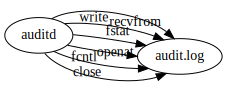

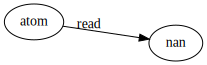

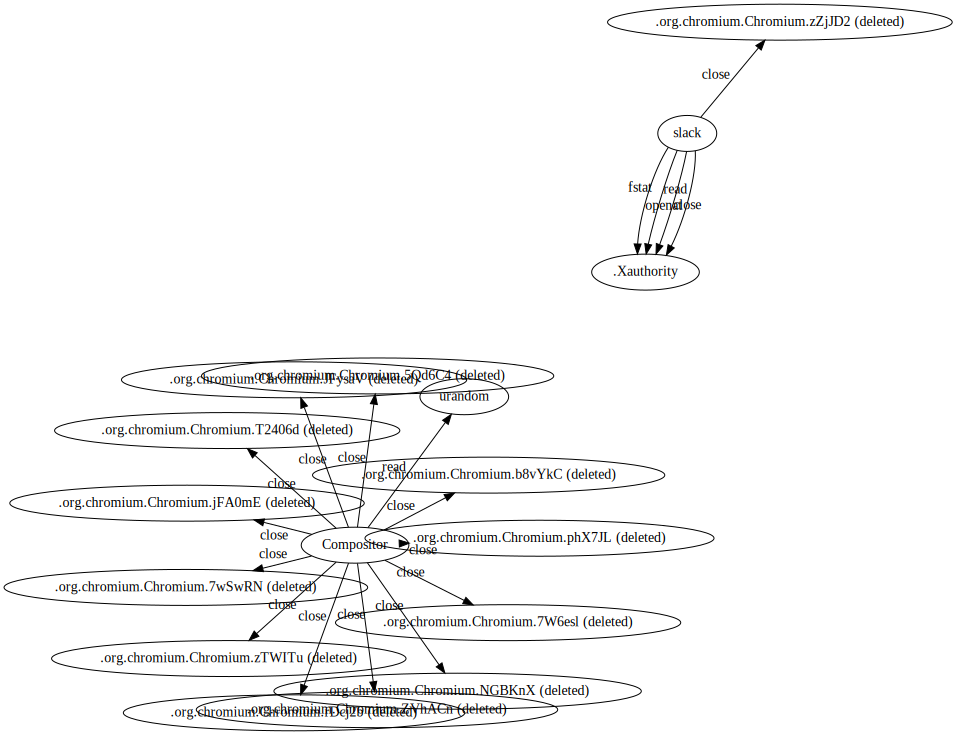

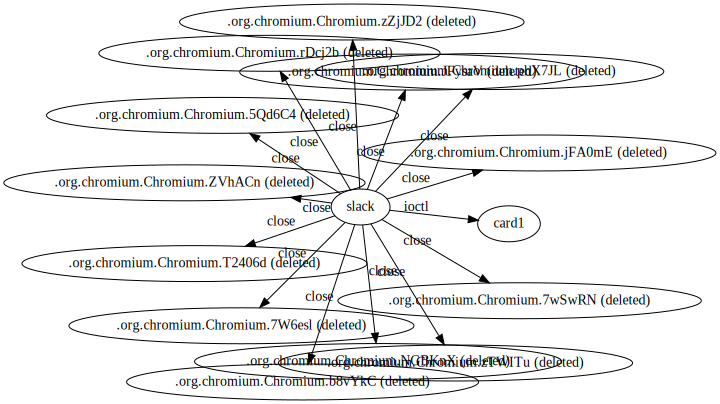

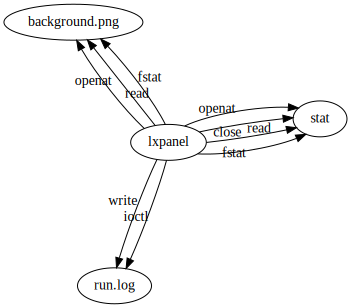

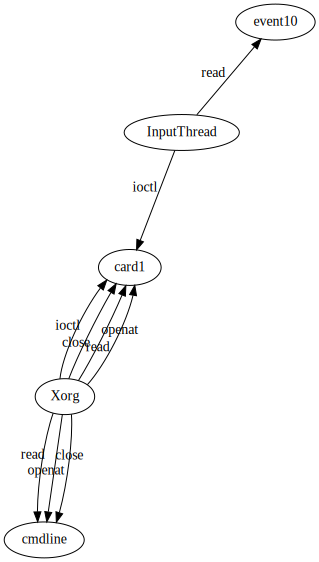

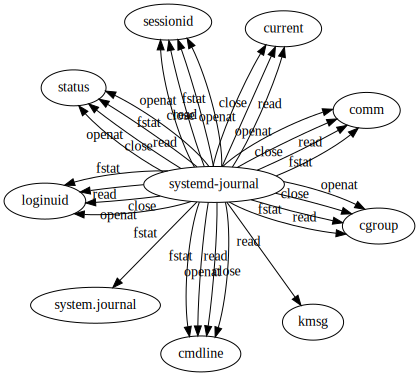

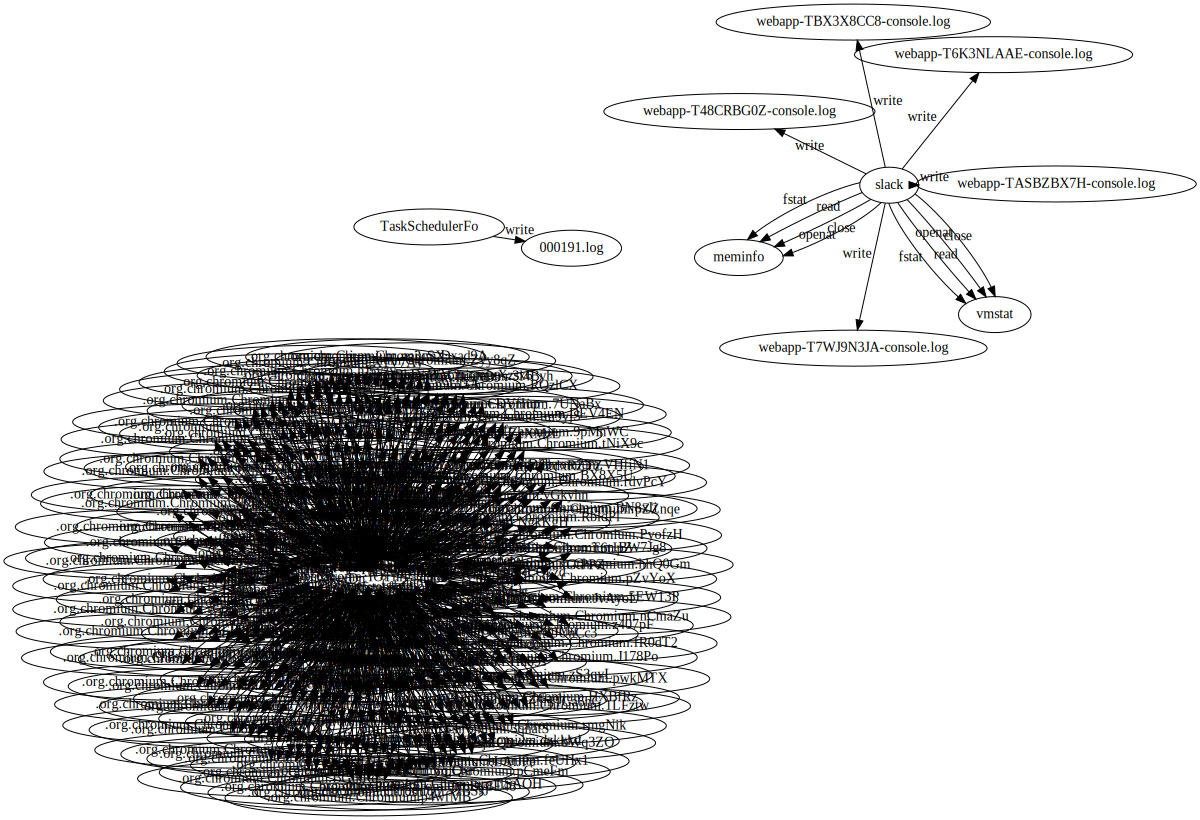

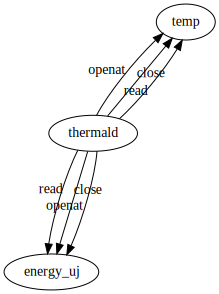

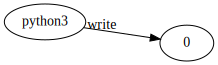

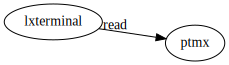

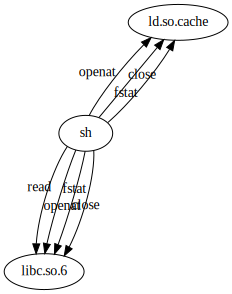

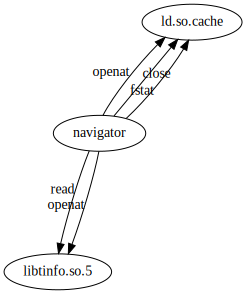

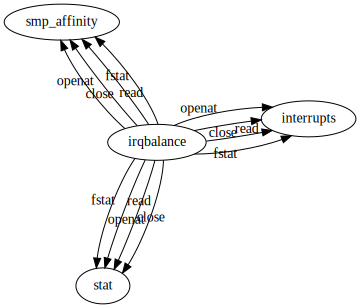

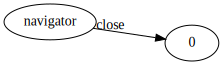

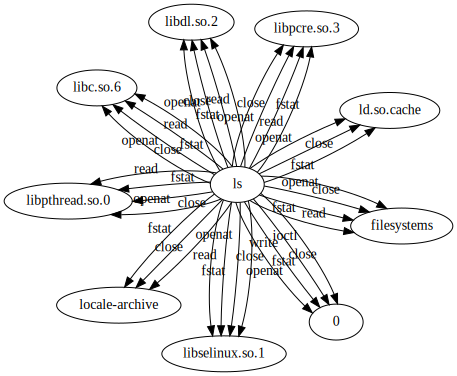

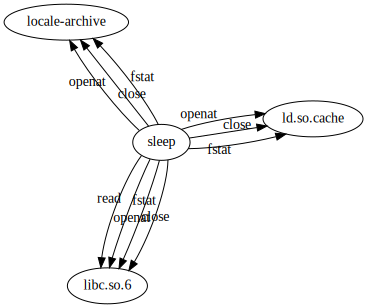

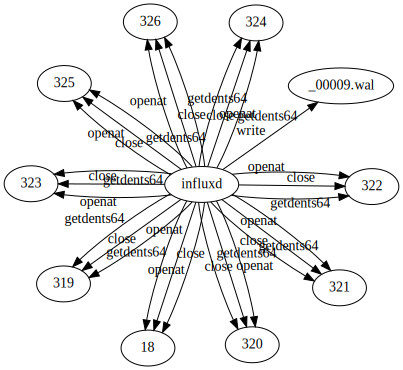

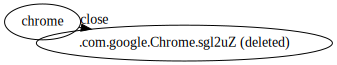

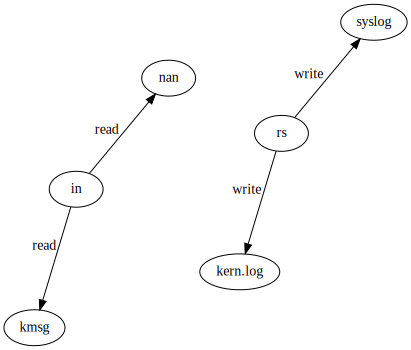

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


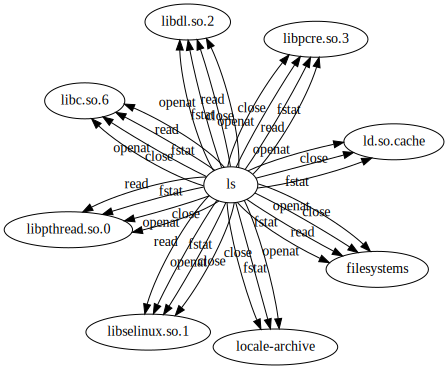

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


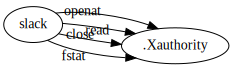

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


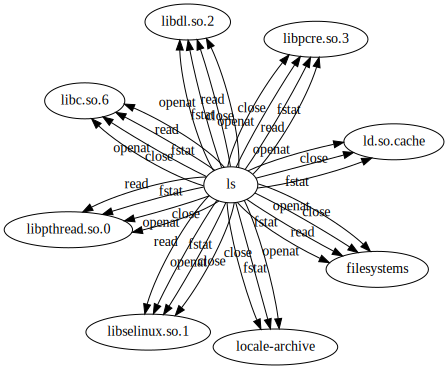

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


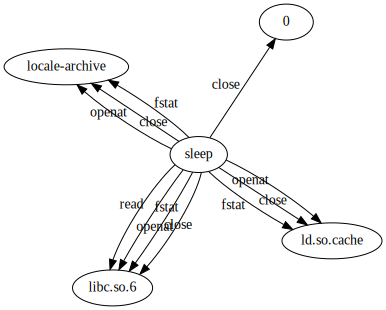

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


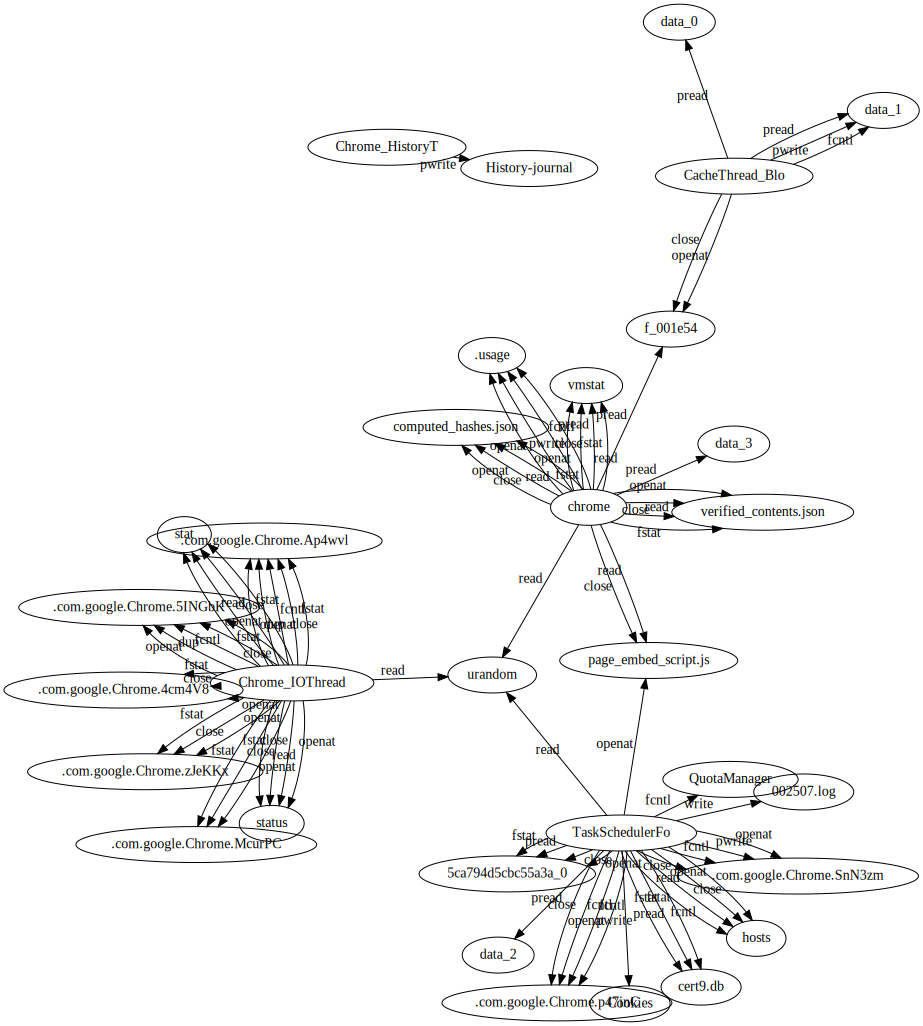

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


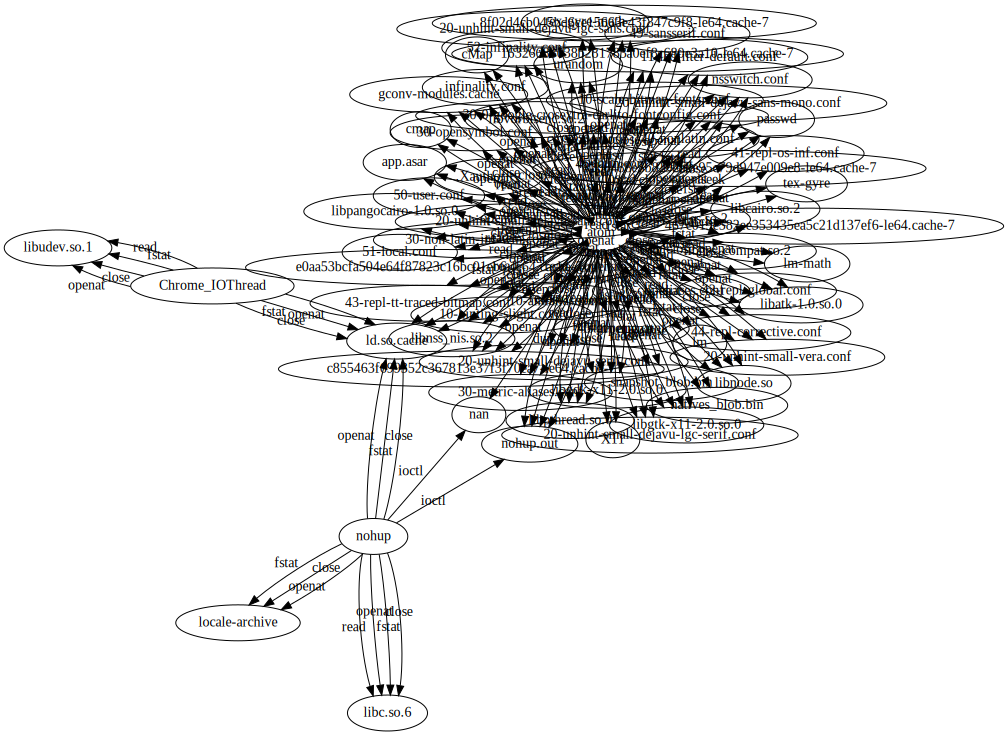

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


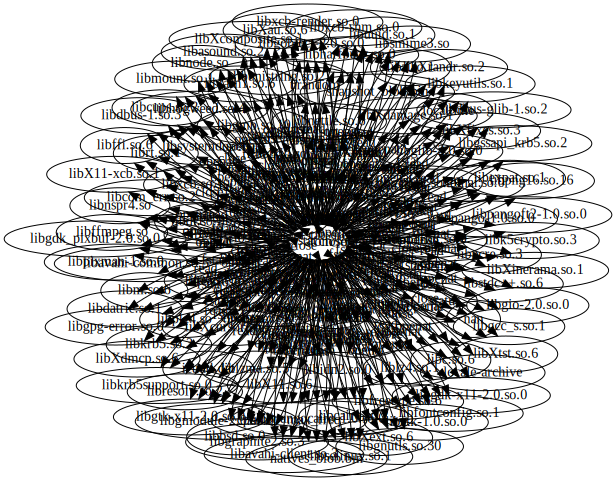

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


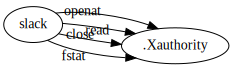

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


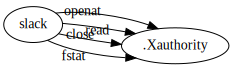

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


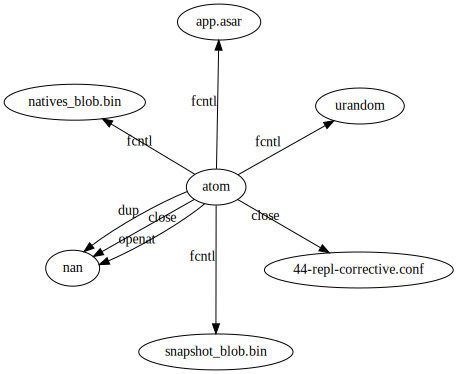

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


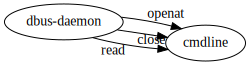

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


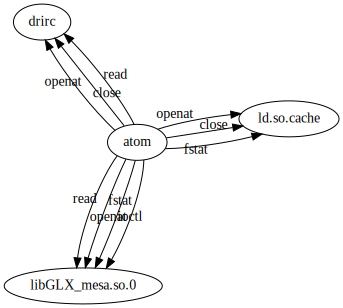

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


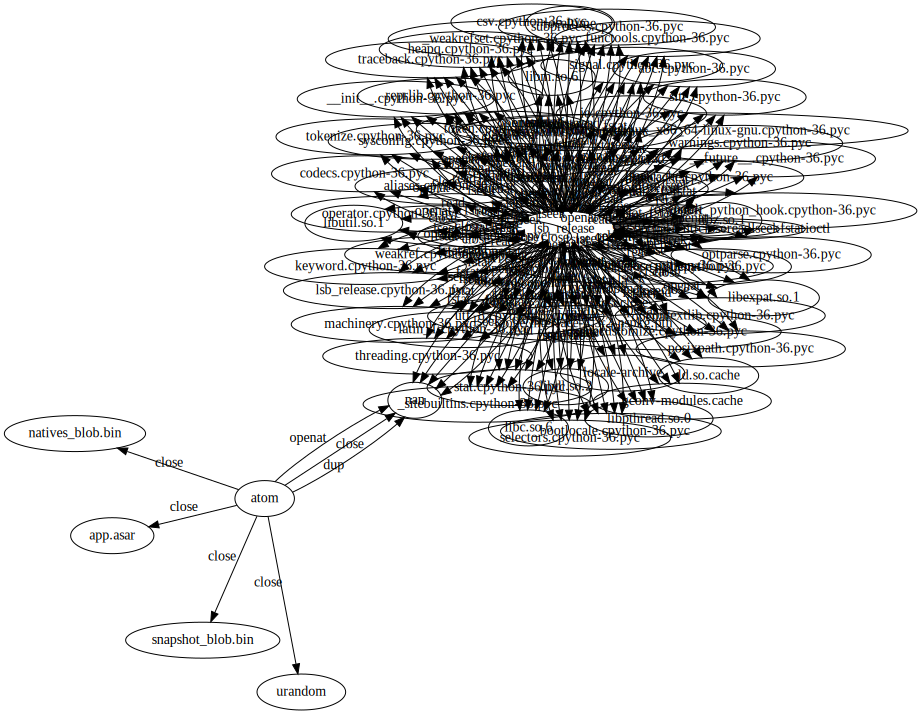

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


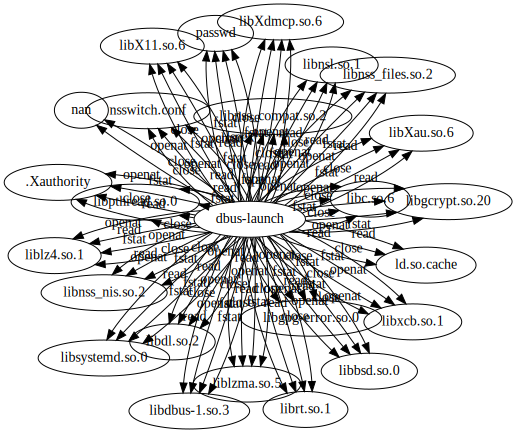

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


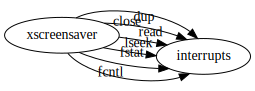

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


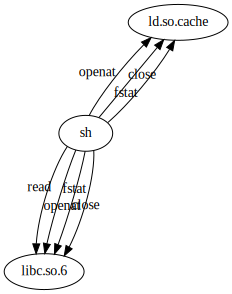

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


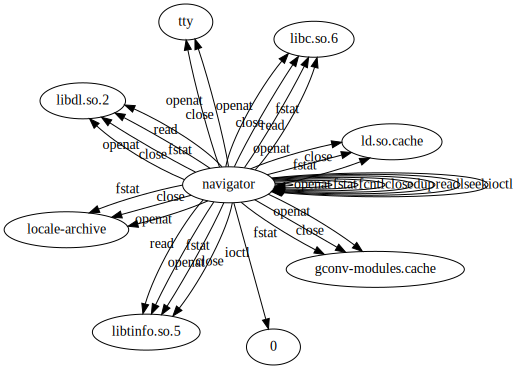

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


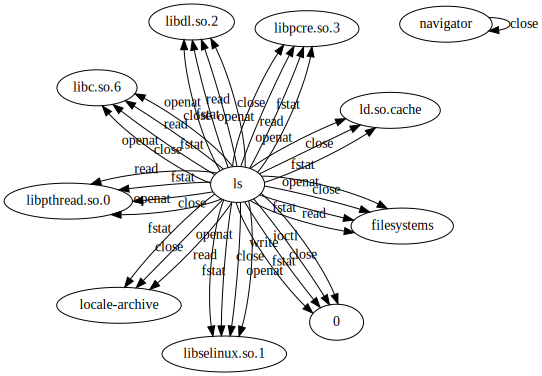

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


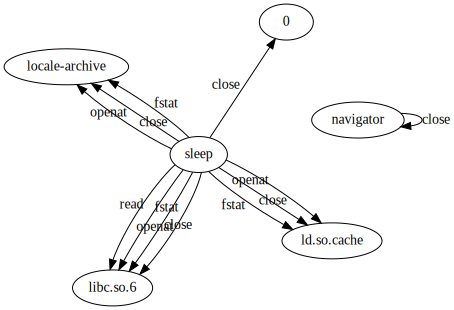

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


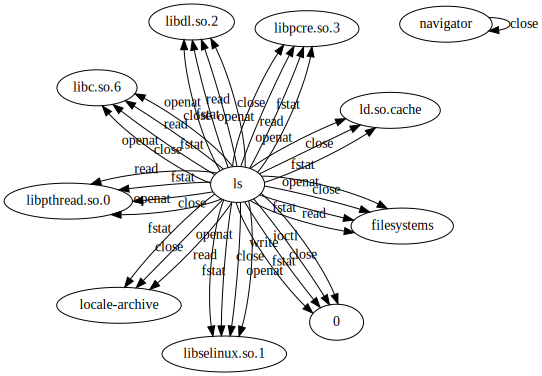

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


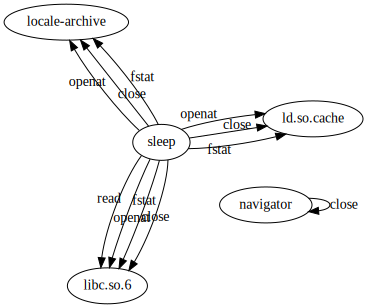

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


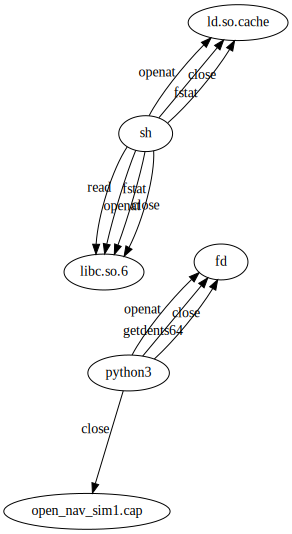

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


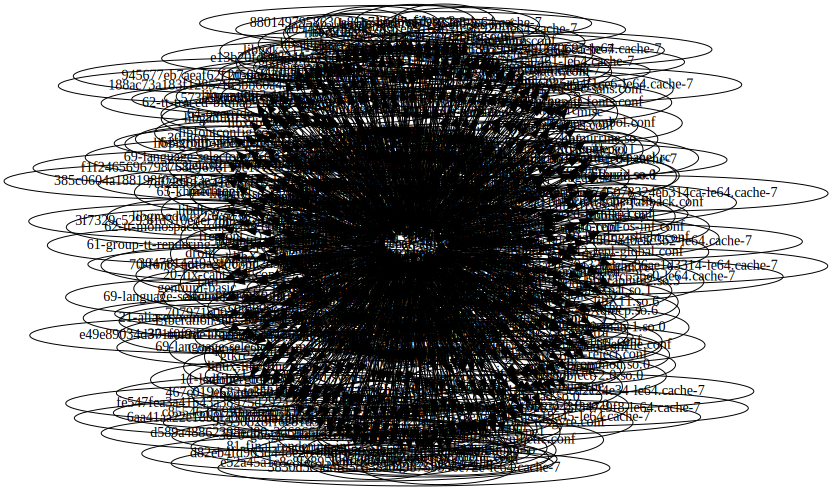

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


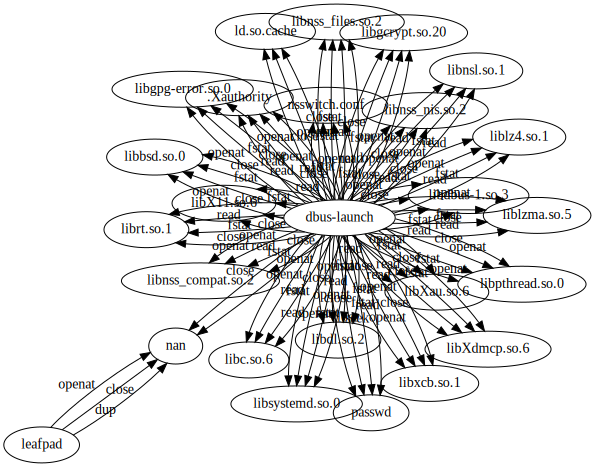

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


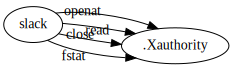

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


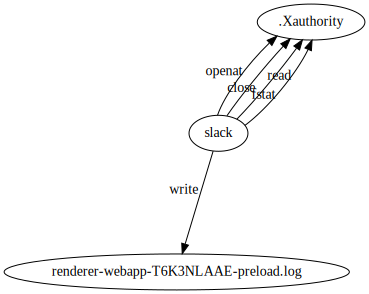

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


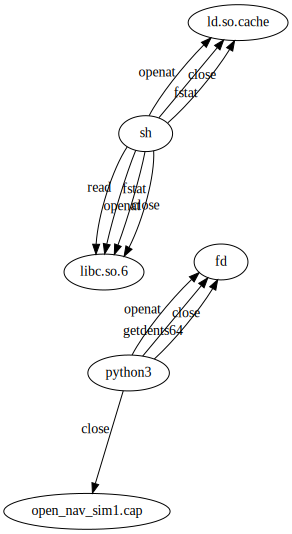

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


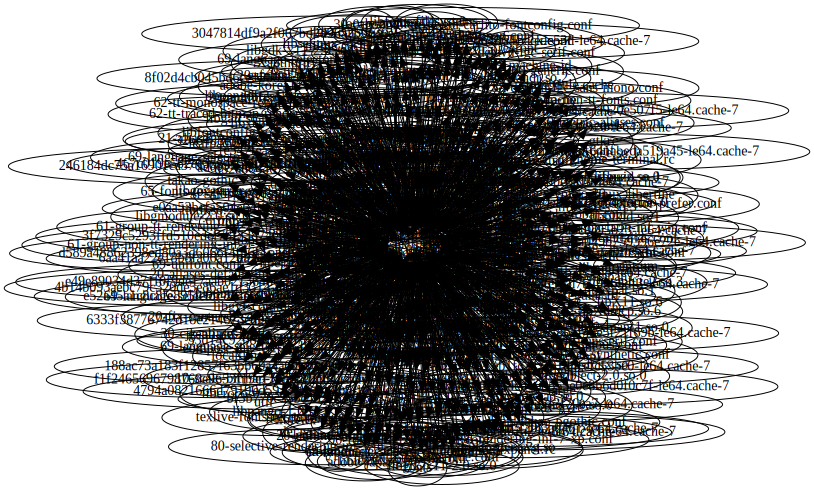

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


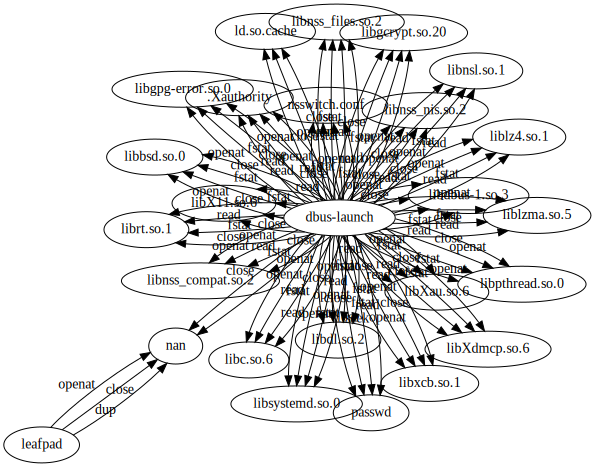

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


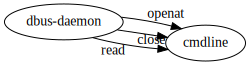

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


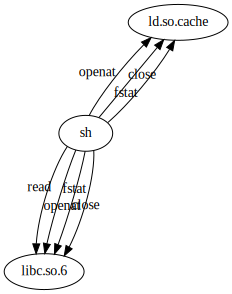

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


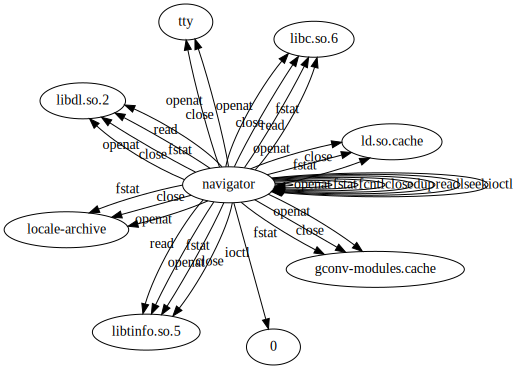

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


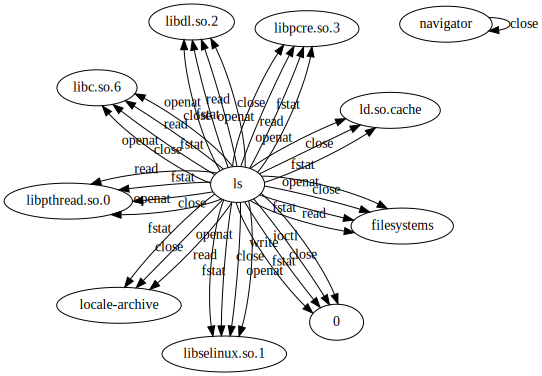

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


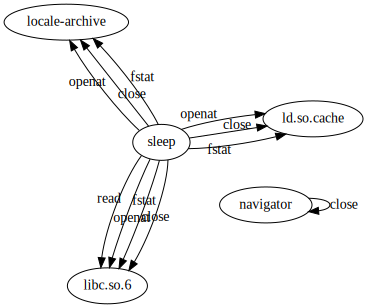

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


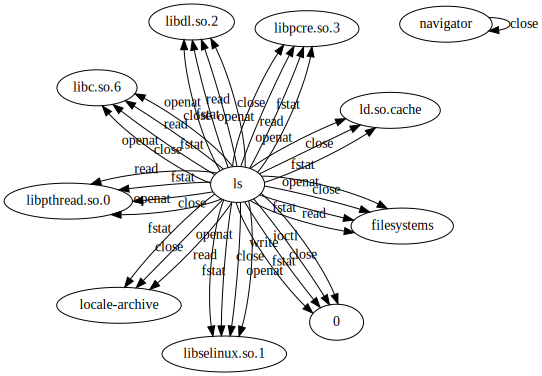

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


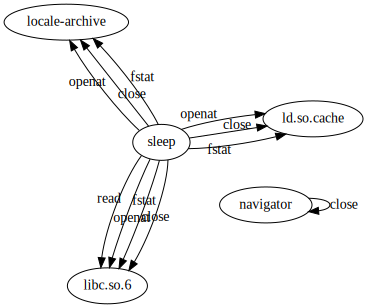

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


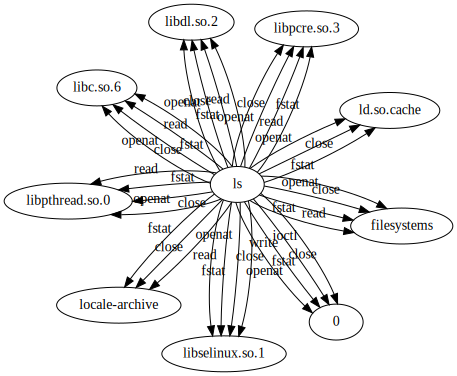

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


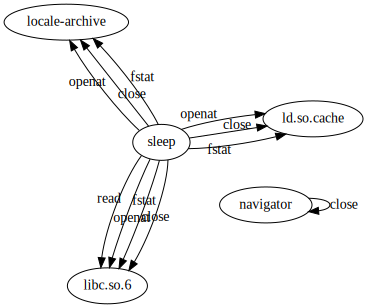

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


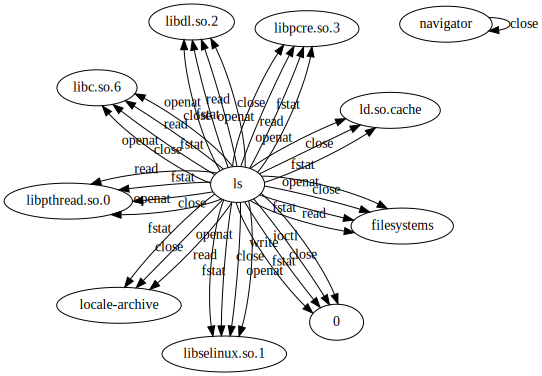

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


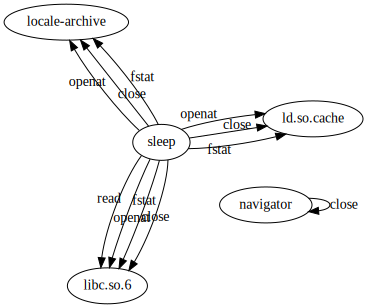

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


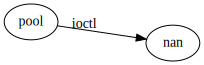

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


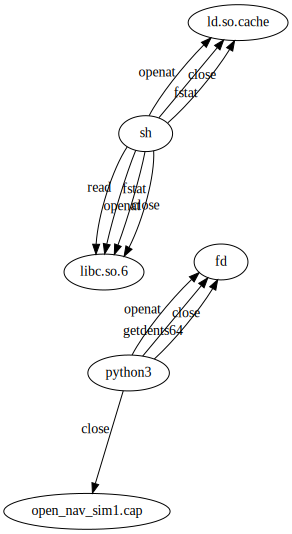

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


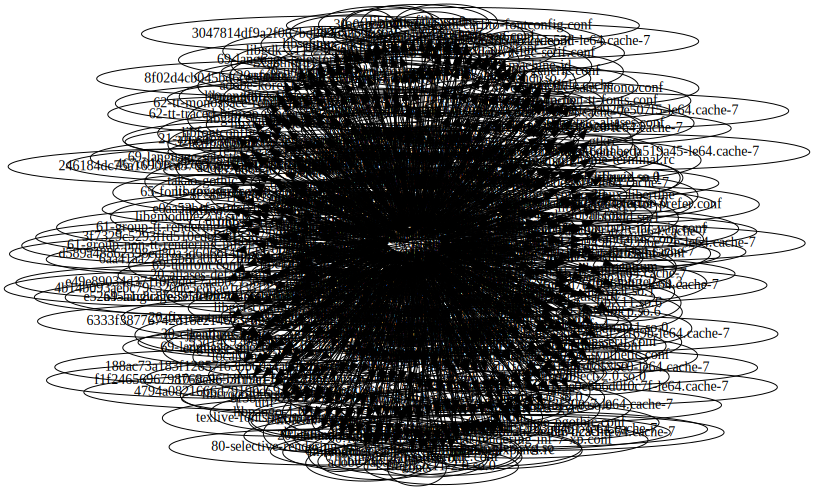

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


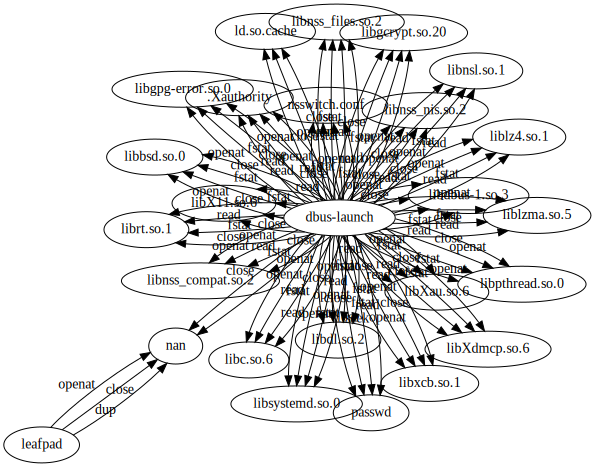

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


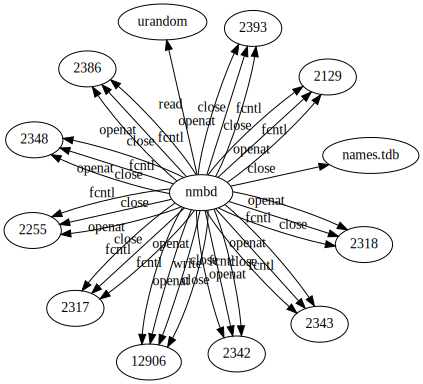

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


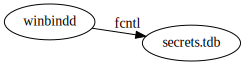

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


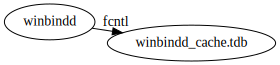

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


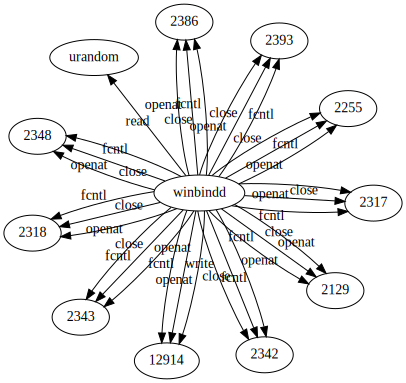

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


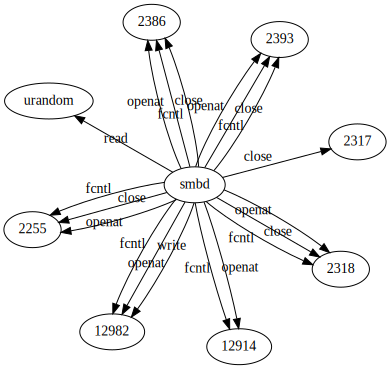

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


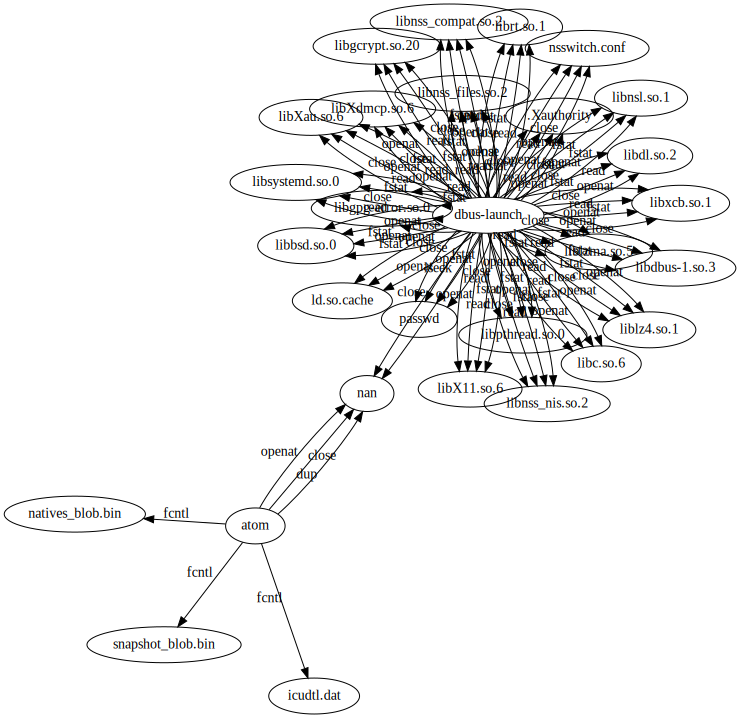

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


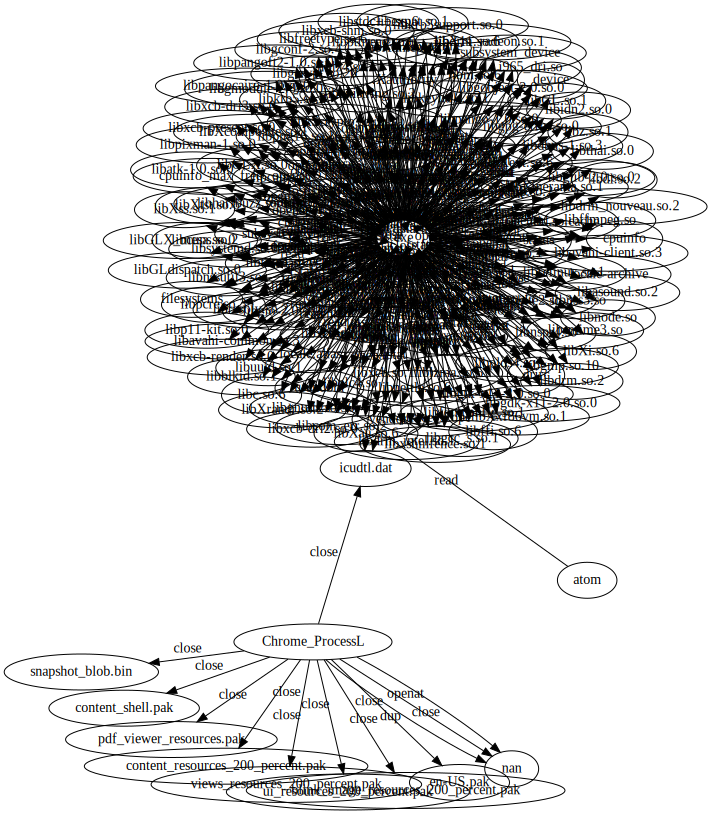

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


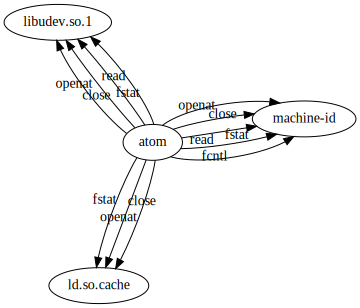

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


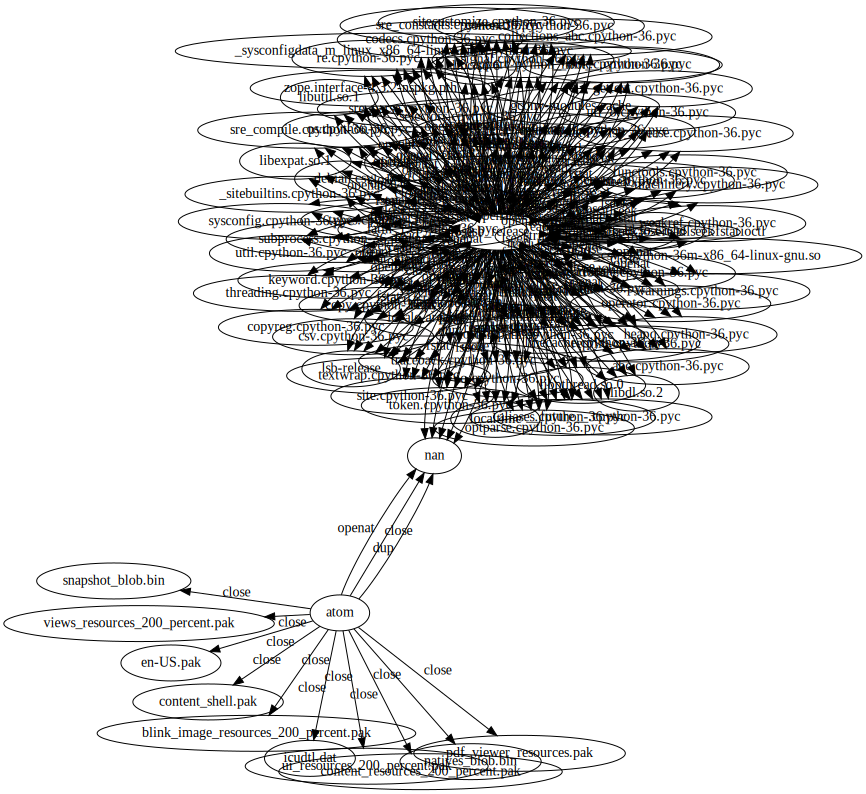

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


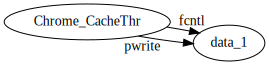

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


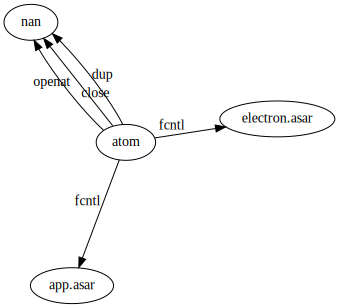

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


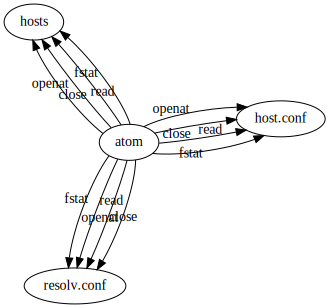

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


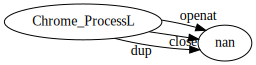

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


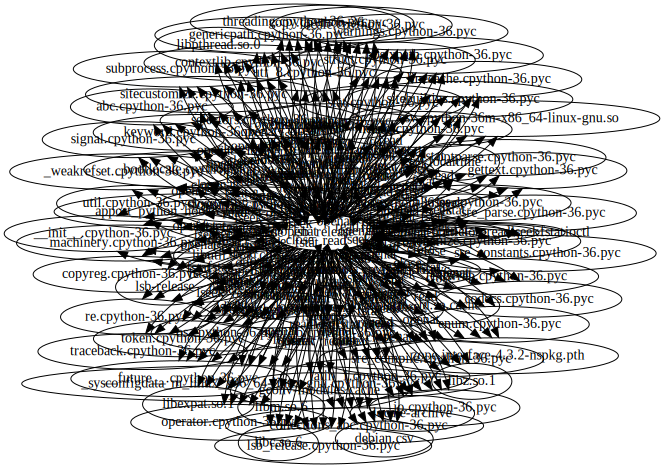

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


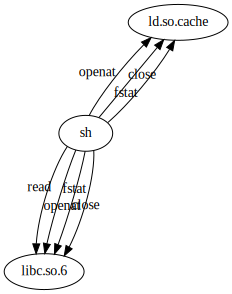

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


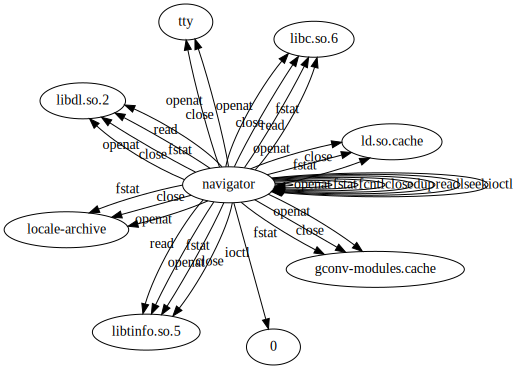

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


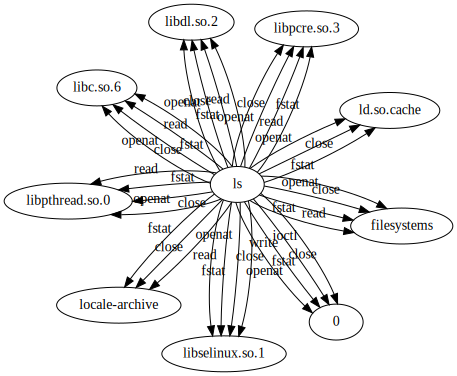

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


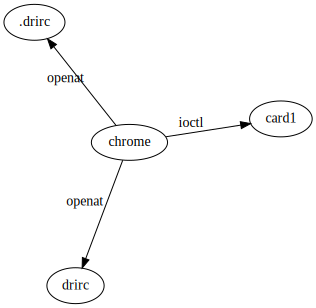

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


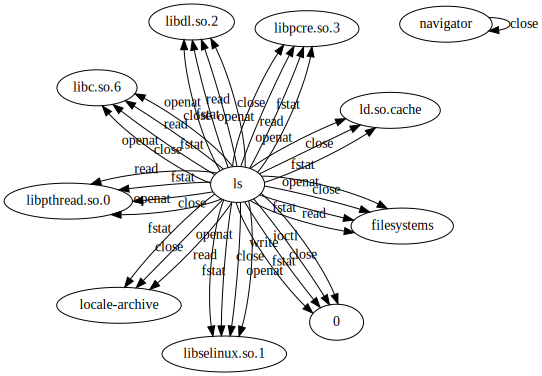

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


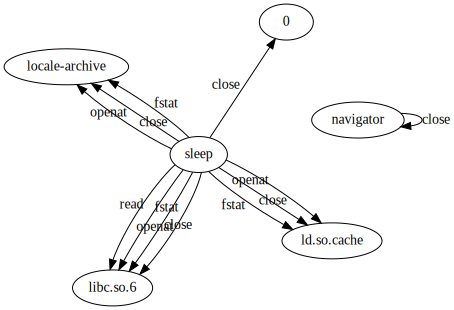

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


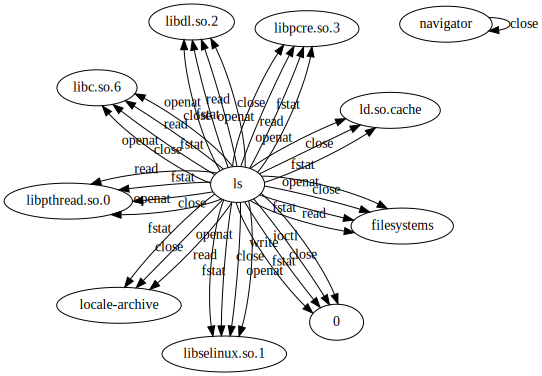

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


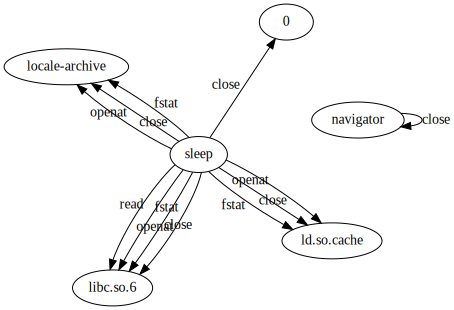

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


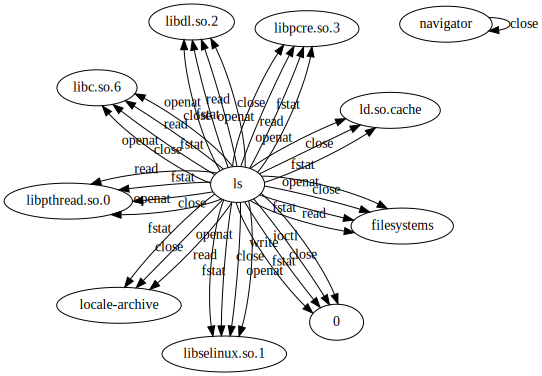

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


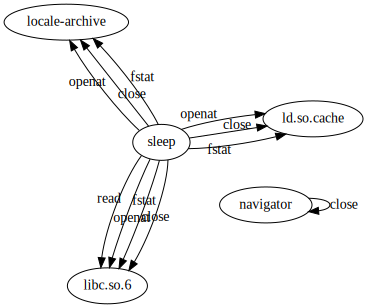

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


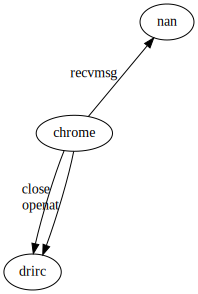

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


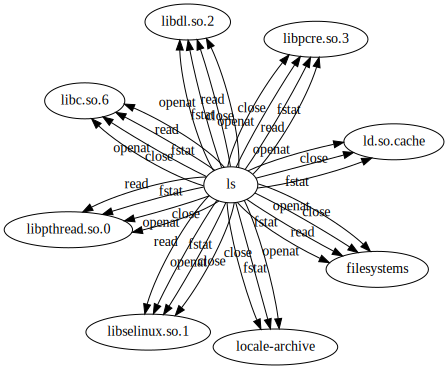

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


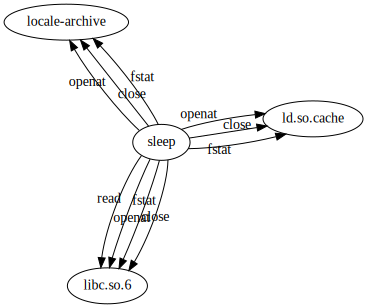

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


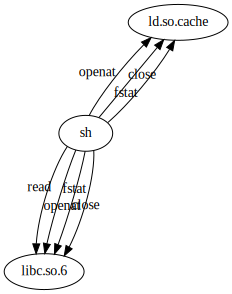

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


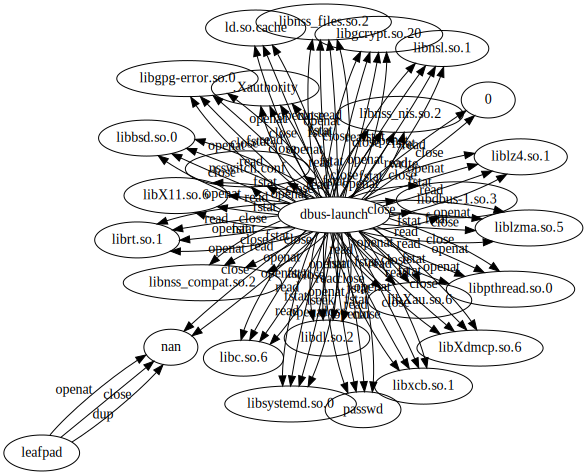

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


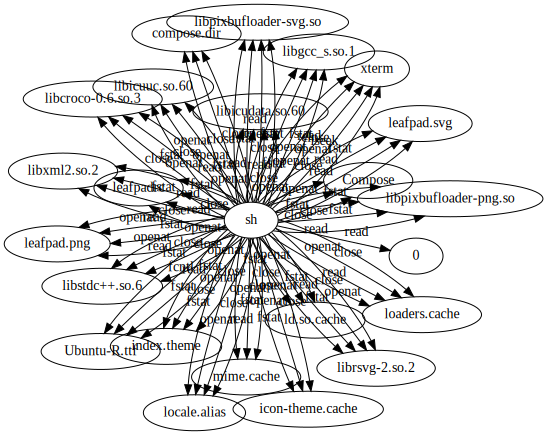

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


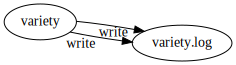

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


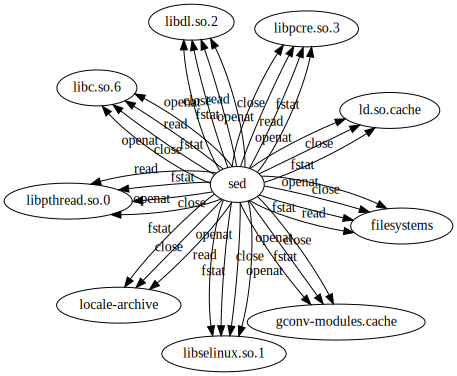

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


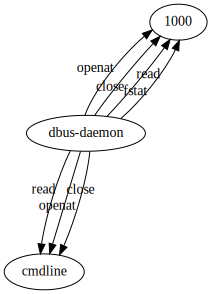

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


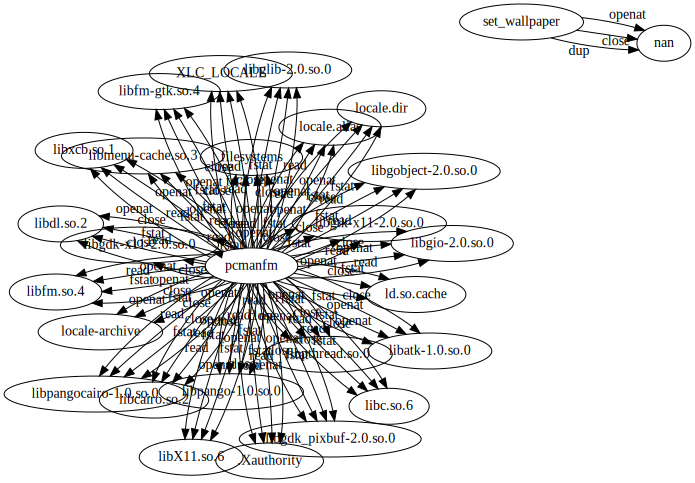

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


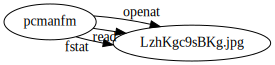

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


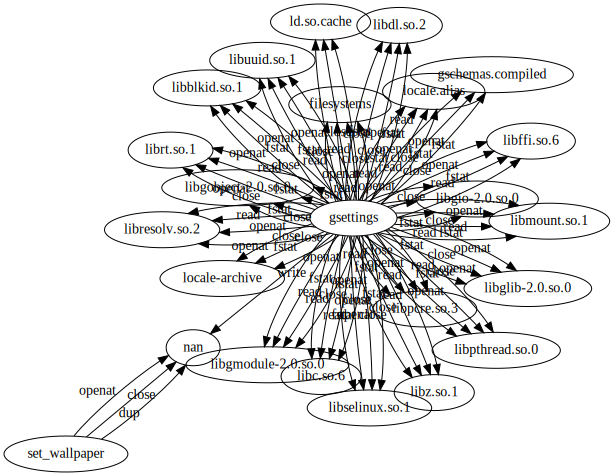

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


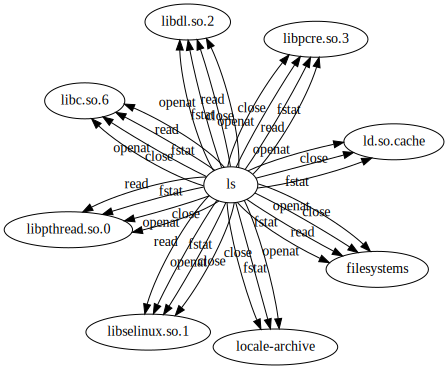

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


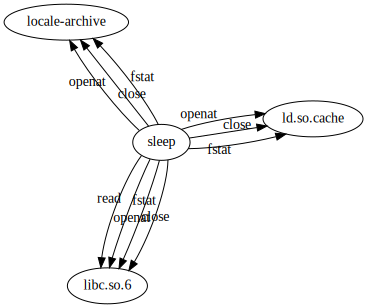

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


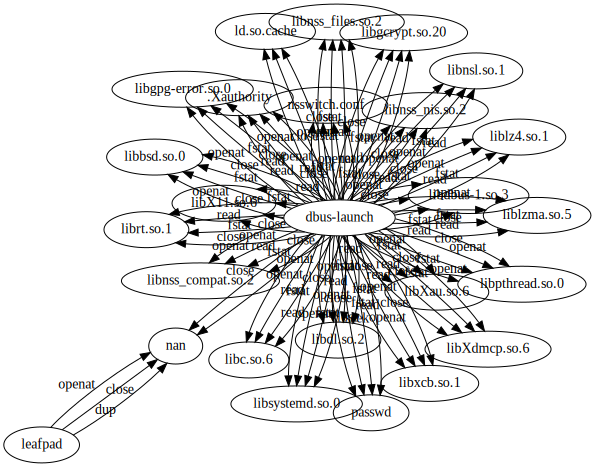

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


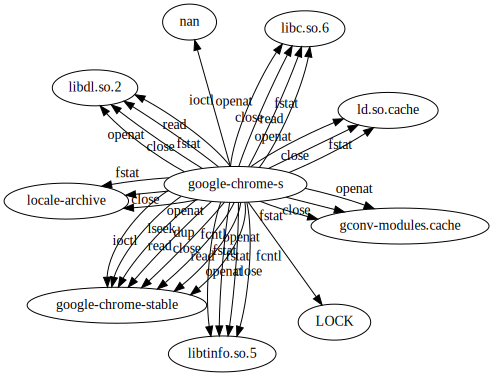

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


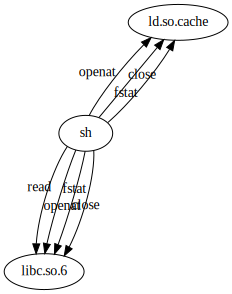

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


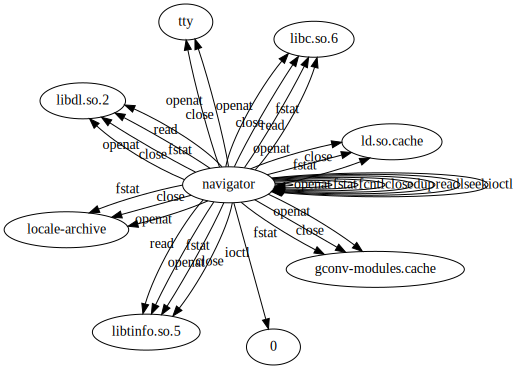

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


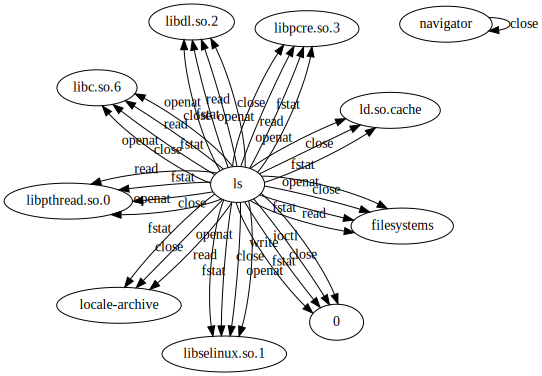

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


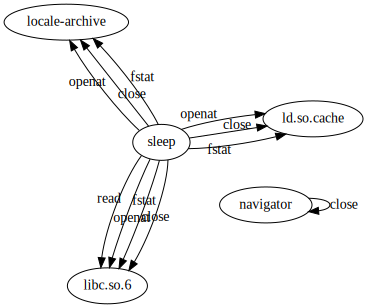

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


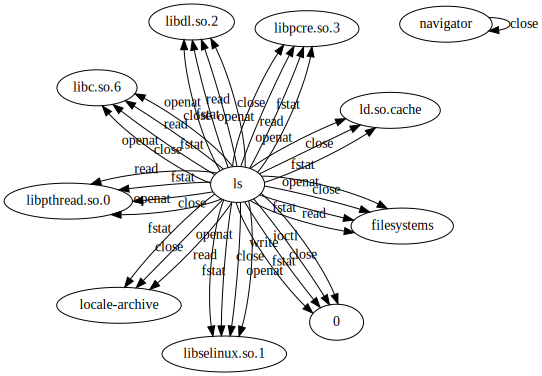

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


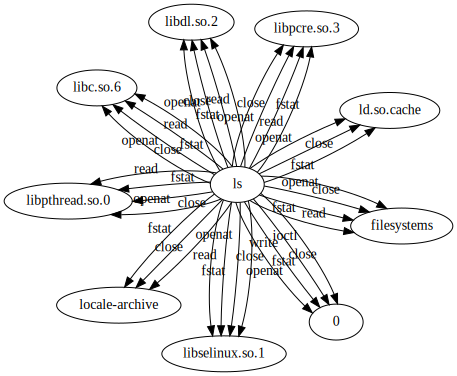

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


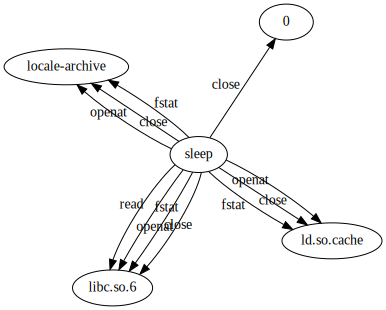

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


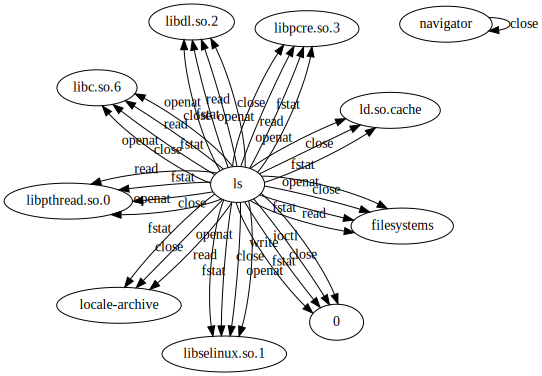

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


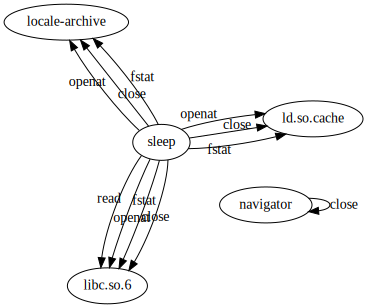

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


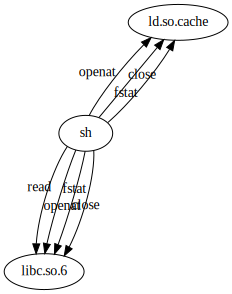

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


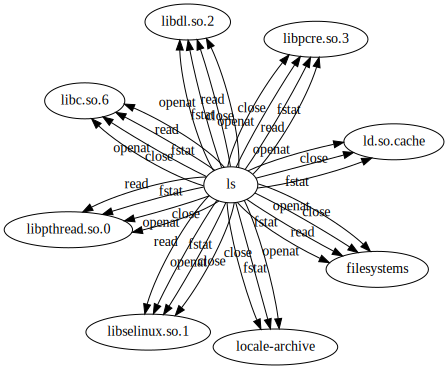

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


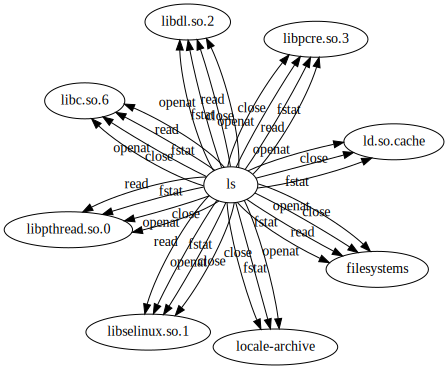

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


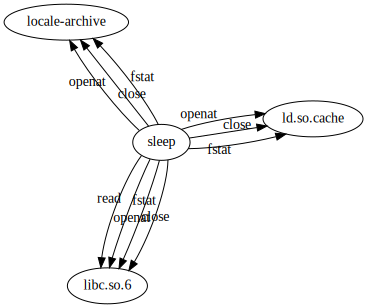

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


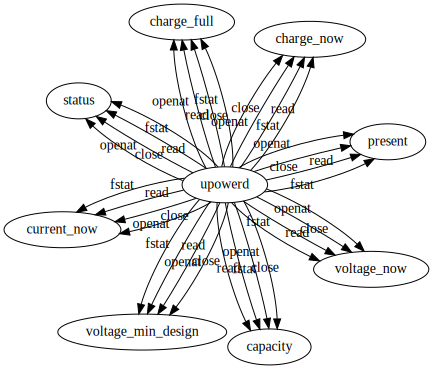

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


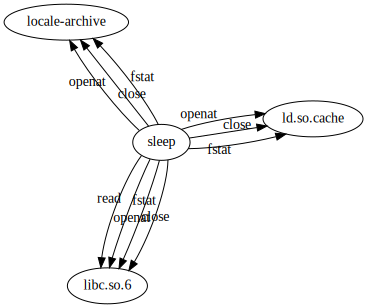

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


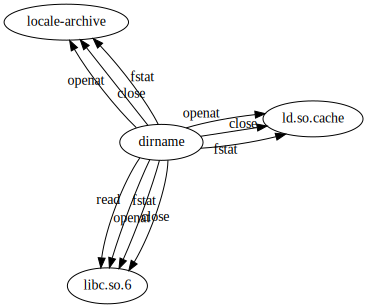

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


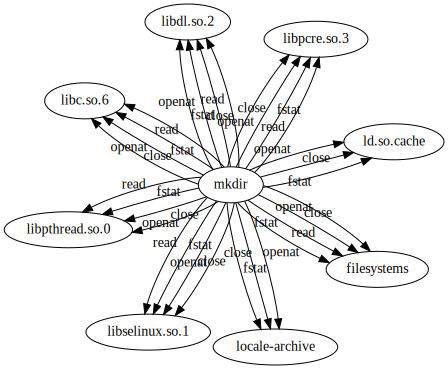

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


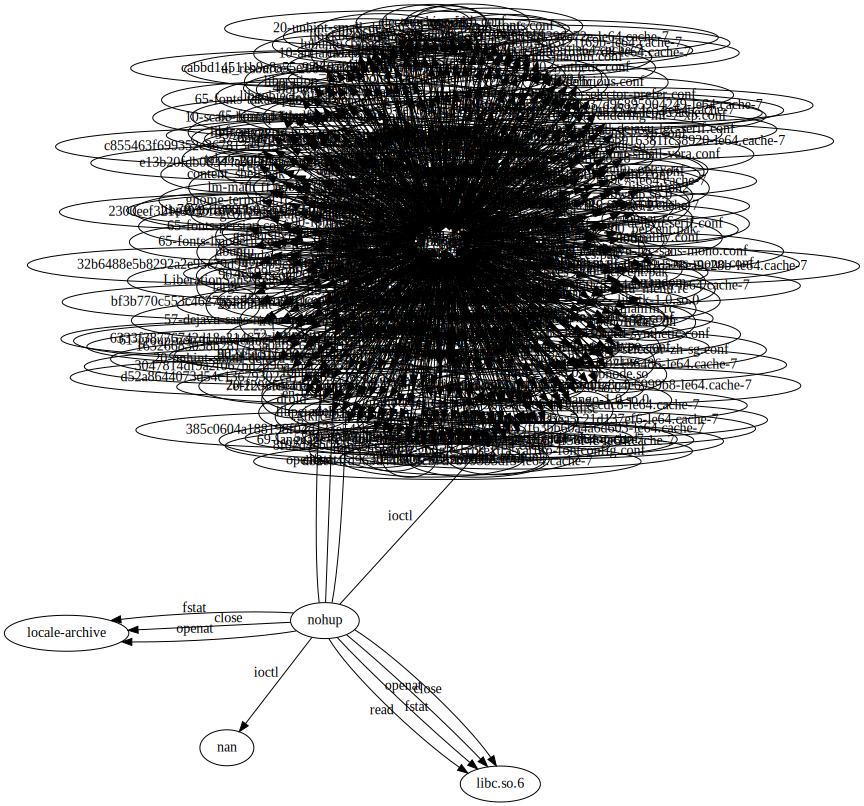

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


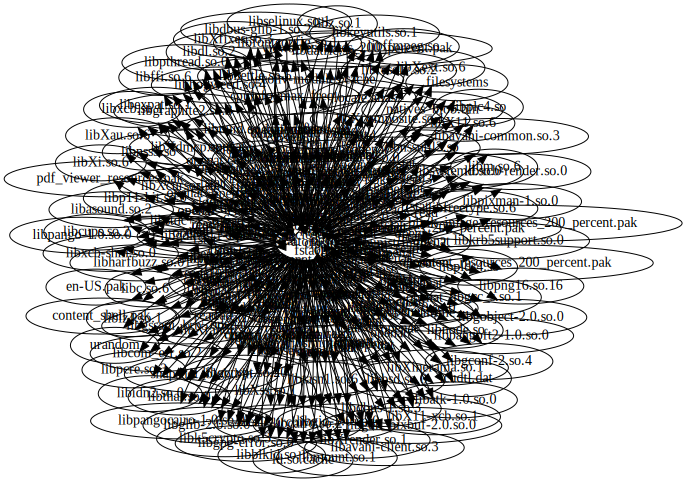

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


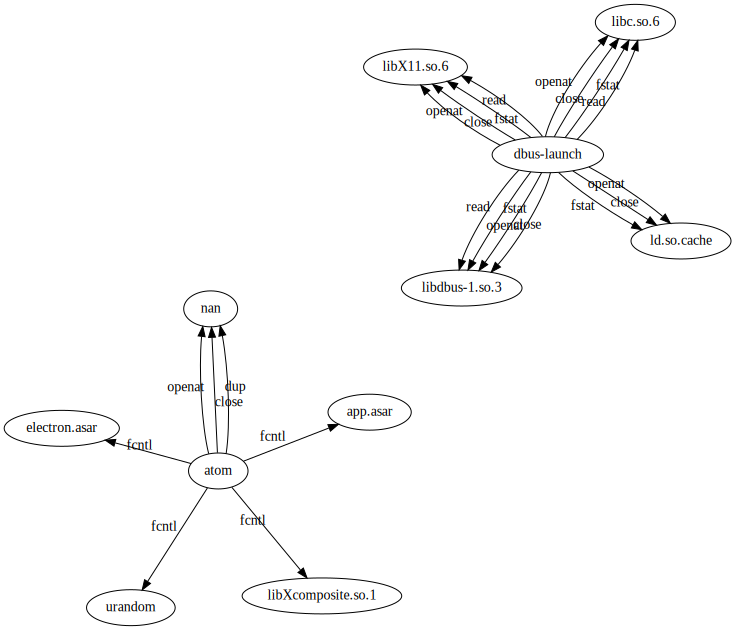

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


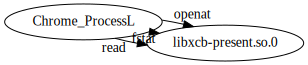

In [16]:
for proc in processes:
    print("="*10)
    G = graphviz.Digraph(engine='neato')
    edge_labels = {}
    for i, row in proc.iterrows():
        G.edge(str(row["process"]), str(row["file"]), label=row["event"], len='2.00')
    fig = plotter.figure(figsize=(20,20))
    display(G)

------

In [17]:
from sklearn.preprocessing import LabelEncoder
from functools import reduce
import matplotlib.pyplot as plotter

In [18]:
def plot_line(seq):
    fig = plotter.figure(figsize=(15,5))
    plotter.plot(seq[:100], alpha=0.5, linewidth=0.5, marker='.')
    plotter.ylim(-2, 20)
    plotter.show()

In [19]:
encoder = LabelEncoder()

data = relevant

syscalls = data["event"]
data["syscalls"] = syscalls
data["event"] = encoder.fit_transform(syscalls)

In [20]:
data.head(10)

parent  parent_pid     process    pid  event  \
0     systemd           1      auditd   1093     13   
5252     atom       23446        atom  23490     10   
5262    slack       17124  Compositor  17209      0   
5264    slack       17124  Compositor  17209      0   
5266    slack       17122       slack  17158      5   
5272    slack       17122       slack  17158      0   
5694    slack       17124  Compositor  17209      0   
5707    slack       17124  Compositor  17209      0   
5738    slack       17124  Compositor  17209      0   
5751    slack       17124  Compositor  17209      0   

                                         file            cmd syscalls  
0                                   audit.log        auditd     write  
5252                                      NaN  atom -sandbox     read  
5262  .org.chromium.Chromium.b8vYkC (deleted)    Compositor     close  
5264  .org.chromium.Chromium.rDcj2b (deleted)    Compositor     close  
5266                                    card1         slack     ioctl  
5272  .org.chromium.Chromium.b8vYkC (deleted)         slack     close  
5694  .org.chromium.Chromium.JFysaV (deleted)    Compositor     close  
5707  .org.chromium.Chromium.5Qd6C4 (deleted)    Compositor     close  
5738  .org.chromium.Chromium.T2406d (deleted)    Compositor     close  
5751  .org.chromium.Chromium.7wSwRN (deleted)    Compositor     close

In [21]:
relevant = data[(data["process"] == "sh") | (data["parent"] == "sh")].drop_duplicates()

In [22]:
relevant.head(10)

parent  parent_pid    process    pid  event         file  \
101807  python3       11225         sh  11262      7  ld.so.cache   
101808  python3       11225         sh  11262      3  ld.so.cache   
101810  python3       11225         sh  11262      0  ld.so.cache   
101812  python3       11225         sh  11262      7    libc.so.6   
101813  python3       11225         sh  11262     10    libc.so.6   
101815  python3       11225         sh  11262      3    libc.so.6   
101817  python3       11225         sh  11262      0    libc.so.6   
101821       sh       11262  navigator  11263      7  ld.so.cache   
101822       sh       11262  navigator  11263      3  ld.so.cache   
101824       sh       11262  navigator  11263      0  ld.so.cache   

                                                      cmd syscalls  
101807  sh -c /home/adityas/Projects/LogAnalyser/scrip...   openat  
101808  sh -c /home/adityas/Projects/LogAnalyser/scrip...    fstat  
101810  sh -c /home/adityas/Projects/LogAnalyser/scrip...    close  
101812  sh -c /home/adityas/Projects/LogAnalyser/scrip...   openat  
101813  sh -c /home/adityas/Projects/LogAnalyser/scrip...     read  
101815  sh -c /home/adityas/Projects/LogAnalyser/scrip...    fstat  
101817  sh -c /home/adityas/Projects/LogAnalyser/scrip...    close  
101821  navigator /home/adityas/Projects/LogAnalyser/s...   openat  
101822  navigator /home/adityas/Projects/LogAnalyser/s...    fstat  
101824  navigator /home/adityas/Projects/LogAnalyser/s...    close

Seperate atom and leafpad data

In [23]:
procs = []
for pid in relevant["pid"].unique():
    procs.append(relevant[relevant["pid"] == pid])

In [24]:
#print(list(map(lambda x: x.shape[0], data_points)))
events = list(map(lambda x: numpy.array(x["event"]), procs))
#print(list(events))
max_len = reduce(lambda a,b: max(a,b), map(lambda x: x.shape[0], events))
#print(max_len)
#print(list(events))
data_points = list(map(lambda x: numpy.pad(x, (0, max_len - x.shape[0]), 'constant', constant_values=-1), events))

parent  parent_pid process    pid  event         file  \
101807  python3       11225      sh  11262      7  ld.so.cache   
101808  python3       11225      sh  11262      3  ld.so.cache   
101810  python3       11225      sh  11262      0  ld.so.cache   
101812  python3       11225      sh  11262      7    libc.so.6   
101813  python3       11225      sh  11262     10    libc.so.6   
101815  python3       11225      sh  11262      3    libc.so.6   
101817  python3       11225      sh  11262      0    libc.so.6   

                                                      cmd syscalls  
101807  sh -c /home/adityas/Projects/LogAnalyser/scrip...   openat  
101808  sh -c /home/adityas/Projects/LogAnalyser/scrip...    fstat  
101810  sh -c /home/adityas/Projects/LogAnalyser/scrip...    close  
101812  sh -c /home/adityas/Projects/LogAnalyser/scrip...   openat  
101813  sh -c /home/adityas/Projects/LogAnalyser/scrip...     read  
101815  sh -c /home/adityas/Projects/LogAnalyser/scrip...    fstat  
101817  sh -c /home/adityas/Projects/LogAnalyser/scrip...    close

/home/adityas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


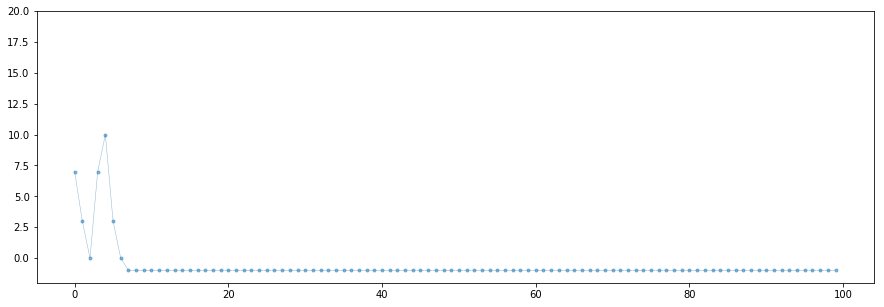

parent  parent_pid    process    pid  event           file  \
101821     sh       11262  navigator  11263      7    ld.so.cache   
101822     sh       11262  navigator  11263      3    ld.so.cache   
101824     sh       11262  navigator  11263      0    ld.so.cache   
101826     sh       11262  navigator  11263      7  libtinfo.so.5   
101827     sh       11262  navigator  11263     10  libtinfo.so.5   

                                                      cmd syscalls  
101821  navigator /home/adityas/Projects/LogAnalyser/s...   openat  
101822  navigator /home/adityas/Projects/LogAnalyser/s...    fstat  
101824  navigator /home/adityas/Projects/LogAnalyser/s...    close  
101826  navigator /home/adityas/Projects/LogAnalyser/s...   openat  
101827  navigator /home/adityas/Projects/LogAnalyser/s...     read

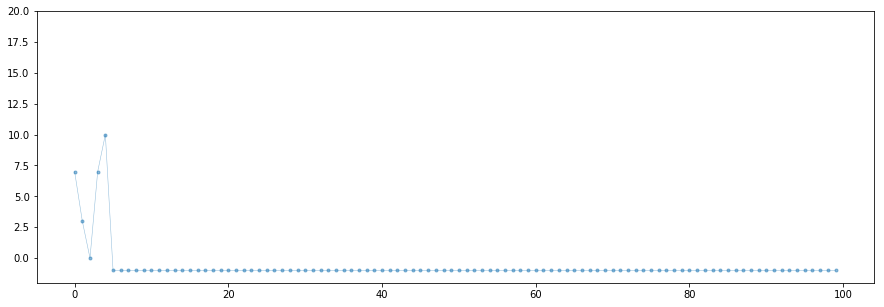

parent  parent_pid process    pid  event         file  \
1702447  python3       11225      sh  11915      7  ld.so.cache   
1702449  python3       11225      sh  11915      3  ld.so.cache   
1702454  python3       11225      sh  11915      0  ld.so.cache   
1702462  python3       11225      sh  11915      7    libc.so.6   
1702463  python3       11225      sh  11915     10    libc.so.6   
1702465  python3       11225      sh  11915      3    libc.so.6   
1702477  python3       11225      sh  11915      0    libc.so.6   

                                                       cmd syscalls  
1702447  sh -c /home/adityas/Projects/LogAnalyser/scrip...   openat  
1702449  sh -c /home/adityas/Projects/LogAnalyser/scrip...    fstat  
1702454  sh -c /home/adityas/Projects/LogAnalyser/scrip...    close  
1702462  sh -c /home/adityas/Projects/LogAnalyser/scrip...   openat  
1702463  sh -c /home/adityas/Projects/LogAnalyser/scrip...     read  
1702465  sh -c /home/adityas/Projects/LogAnalyser/scrip...    fstat  
1702477  sh -c /home/adityas/Projects/LogAnalyser/scrip...    close

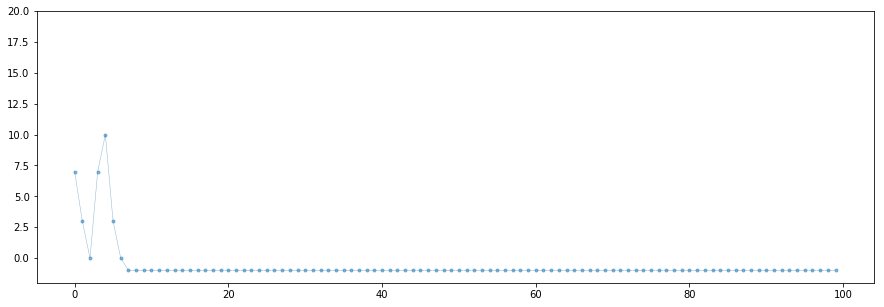

parent  parent_pid    process    pid  event           file  \
1705255     sh       11915  navigator  11916      7    ld.so.cache   
1705256     sh       11915  navigator  11916      3    ld.so.cache   
1705262     sh       11915  navigator  11916      0    ld.so.cache   
1705268     sh       11915  navigator  11916      7  libtinfo.so.5   
1705269     sh       11915  navigator  11916     10  libtinfo.so.5   
1705271     sh       11915  navigator  11916      3  libtinfo.so.5   
1705281     sh       11915  navigator  11916      0  libtinfo.so.5   
1705287     sh       11915  navigator  11916      7     libdl.so.2   
1705288     sh       11915  navigator  11916     10     libdl.so.2   
1705290     sh       11915  navigator  11916      3     libdl.so.2   

                                                       cmd syscalls  
1705255  navigator /home/adityas/Projects/LogAnalyser/s...   openat  
1705256  navigator /home/adityas/Projects/LogAnalyser/s...    fstat  
1705262  navigator /home/adityas/Projects/LogAnalyser/s...    close  
1705268  navigator /home/adityas/Projects/LogAnalyser/s...   openat  
1705269  navigator /home/adityas/Projects/LogAnalyser/s...     read  
1705271  navigator /home/adityas/Projects/LogAnalyser/s...    fstat  
1705281  navigator /home/adityas/Projects/LogAnalyser/s...    close  
1705287  navigator /home/adityas/Projects/LogAnalyser/s...   openat  
1705288  navigator /home/adityas/Projects/LogAnalyser/s...     read  
1705290  navigator /home/adityas/Projects/LogAnalyser/s...    fstat

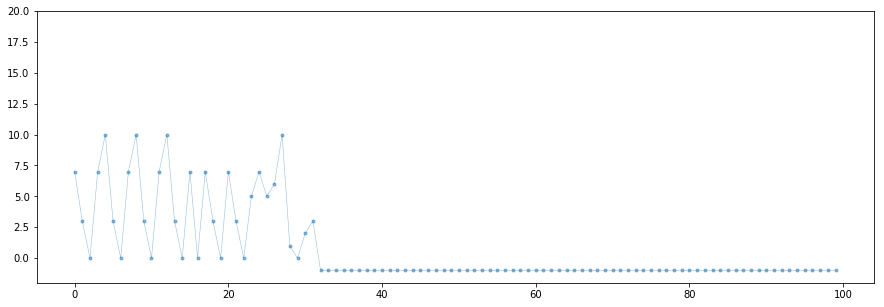

parent  parent_pid process    pid  event         file  \
2180942  python3       11225      sh  12078      7  ld.so.cache   
2180943  python3       11225      sh  12078      3  ld.so.cache   
2180945  python3       11225      sh  12078      0  ld.so.cache   
2180947  python3       11225      sh  12078      7    libc.so.6   
2180948  python3       11225      sh  12078     10    libc.so.6   
2180950  python3       11225      sh  12078      3    libc.so.6   
2180952  python3       11225      sh  12078      0    libc.so.6   

                                         cmd syscalls  
2180942  sh -c leafpad /home/adityas/.bashrc   openat  
2180943  sh -c leafpad /home/adityas/.bashrc    fstat  
2180945  sh -c leafpad /home/adityas/.bashrc    close  
2180947  sh -c leafpad /home/adityas/.bashrc   openat  
2180948  sh -c leafpad /home/adityas/.bashrc     read  
2180950  sh -c leafpad /home/adityas/.bashrc    fstat  
2180952  sh -c leafpad /home/adityas/.bashrc    close

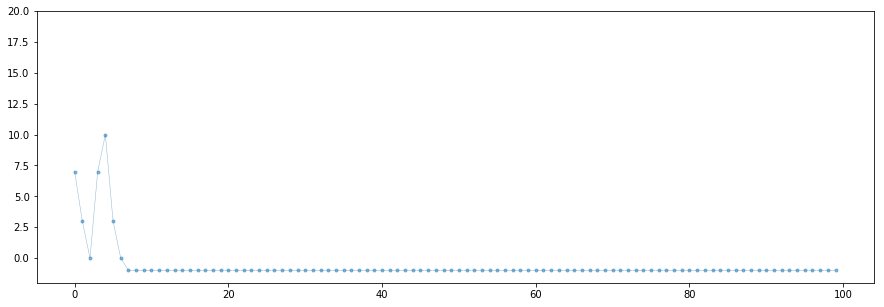

parent  parent_pid  process    pid  event                 file  \
2180954     sh       12078  leafpad  12080      7          ld.so.cache   
2180955     sh       12078  leafpad  12080      3          ld.so.cache   
2180957     sh       12078  leafpad  12080      0          ld.so.cache   
2180959     sh       12078  leafpad  12080      7  libgtk-x11-2.0.so.0   
2180960     sh       12078  leafpad  12080     10  libgtk-x11-2.0.so.0   
2180962     sh       12078  leafpad  12080      3  libgtk-x11-2.0.so.0   
2180964     sh       12078  leafpad  12080      0  libgtk-x11-2.0.so.0   
2180966     sh       12078  leafpad  12080      7  libgdk-x11-2.0.so.0   
2180967     sh       12078  leafpad  12080     10  libgdk-x11-2.0.so.0   
2180969     sh       12078  leafpad  12080      3  libgdk-x11-2.0.so.0   

              cmd syscalls  
2180954  leafpad    openat  
2180955  leafpad     fstat  
2180957  leafpad     close  
2180959  leafpad    openat  
2180960  leafpad      read  
2180962  leafpad     fstat  
2180964  leafpad     close  
2180966  leafpad    openat  
2180967  leafpad      read  
2180969  leafpad     fstat

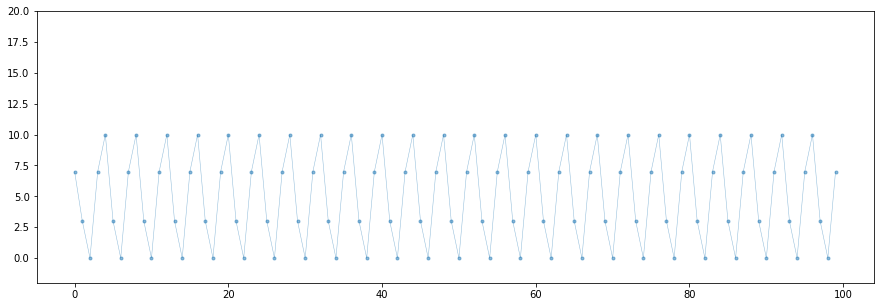

parent  parent_pid process    pid  event         file  \
2726978  python3       11225      sh  12287      7  ld.so.cache   
2726979  python3       11225      sh  12287      3  ld.so.cache   
2726981  python3       11225      sh  12287      0  ld.so.cache   
2726983  python3       11225      sh  12287      7    libc.so.6   
2726984  python3       11225      sh  12287     10    libc.so.6   
2726986  python3       11225      sh  12287      3    libc.so.6   
2726988  python3       11225      sh  12287      0    libc.so.6   

                                         cmd syscalls  
2726978  sh -c leafpad /home/adityas/.bashrc   openat  
2726979  sh -c leafpad /home/adityas/.bashrc    fstat  
2726981  sh -c leafpad /home/adityas/.bashrc    close  
2726983  sh -c leafpad /home/adityas/.bashrc   openat  
2726984  sh -c leafpad /home/adityas/.bashrc     read  
2726986  sh -c leafpad /home/adityas/.bashrc    fstat  
2726988  sh -c leafpad /home/adityas/.bashrc    close

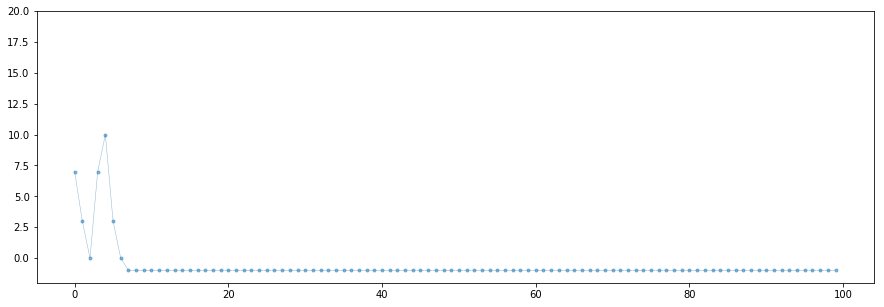

parent  parent_pid  process    pid  event                 file  \
2726990     sh       12287  leafpad  12288      7          ld.so.cache   
2726991     sh       12287  leafpad  12288      3          ld.so.cache   
2726993     sh       12287  leafpad  12288      0          ld.so.cache   
2726995     sh       12287  leafpad  12288      7  libgtk-x11-2.0.so.0   
2726996     sh       12287  leafpad  12288     10  libgtk-x11-2.0.so.0   
2726998     sh       12287  leafpad  12288      3  libgtk-x11-2.0.so.0   
2727000     sh       12287  leafpad  12288      0  libgtk-x11-2.0.so.0   
2727002     sh       12287  leafpad  12288      7  libgdk-x11-2.0.so.0   
2727003     sh       12287  leafpad  12288     10  libgdk-x11-2.0.so.0   
2727005     sh       12287  leafpad  12288      3  libgdk-x11-2.0.so.0   

              cmd syscalls  
2726990  leafpad    openat  
2726991  leafpad     fstat  
2726993  leafpad     close  
2726995  leafpad    openat  
2726996  leafpad      read  
2726998  leafpad     fstat  
2727000  leafpad     close  
2727002  leafpad    openat  
2727003  leafpad      read  
2727005  leafpad     fstat

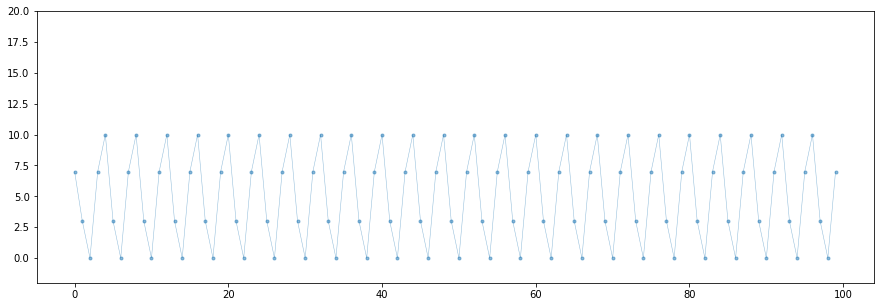

parent  parent_pid process    pid  event         file  \
3424637  python3       11225      sh  12550      7  ld.so.cache   
3424639  python3       11225      sh  12550      3  ld.so.cache   
3424644  python3       11225      sh  12550      0  ld.so.cache   
3424652  python3       11225      sh  12550      7    libc.so.6   
3424654  python3       11225      sh  12550     10    libc.so.6   
3424657  python3       11225      sh  12550      3    libc.so.6   
3424667  python3       11225      sh  12550      0    libc.so.6   

                                                       cmd syscalls  
3424637  sh -c /home/adityas/Projects/LogAnalyser/scrip...   openat  
3424639  sh -c /home/adityas/Projects/LogAnalyser/scrip...    fstat  
3424644  sh -c /home/adityas/Projects/LogAnalyser/scrip...    close  
3424652  sh -c /home/adityas/Projects/LogAnalyser/scrip...   openat  
3424654  sh -c /home/adityas/Projects/LogAnalyser/scrip...     read  
3424657  sh -c /home/adityas/Projects/LogAnalyser/scrip...    fstat  
3424667  sh -c /home/adityas/Projects/LogAnalyser/scrip...    close

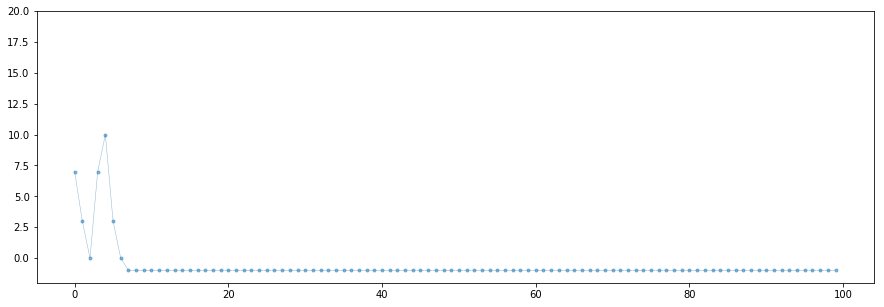

parent  parent_pid    process    pid  event           file  \
3425935     sh       12550  navigator  12551      7    ld.so.cache   
3425936     sh       12550  navigator  12551      3    ld.so.cache   
3425942     sh       12550  navigator  12551      0    ld.so.cache   
3425948     sh       12550  navigator  12551      7  libtinfo.so.5   
3425949     sh       12550  navigator  12551     10  libtinfo.so.5   
3425952     sh       12550  navigator  12551      3  libtinfo.so.5   
3425965     sh       12550  navigator  12551      0  libtinfo.so.5   
3425971     sh       12550  navigator  12551      7     libdl.so.2   
3425972     sh       12550  navigator  12551     10     libdl.so.2   
3425975     sh       12550  navigator  12551      3     libdl.so.2   

                                                       cmd syscalls  
3425935  navigator /home/adityas/Projects/LogAnalyser/s...   openat  
3425936  navigator /home/adityas/Projects/LogAnalyser/s...    fstat  
3425942  navigator /home/adityas/Projects/LogAnalyser/s...    close  
3425948  navigator /home/adityas/Projects/LogAnalyser/s...   openat  
3425949  navigator /home/adityas/Projects/LogAnalyser/s...     read  
3425952  navigator /home/adityas/Projects/LogAnalyser/s...    fstat  
3425965  navigator /home/adityas/Projects/LogAnalyser/s...    close  
3425971  navigator /home/adityas/Projects/LogAnalyser/s...   openat  
3425972  navigator /home/adityas/Projects/LogAnalyser/s...     read  
3425975  navigator /home/adityas/Projects/LogAnalyser/s...    fstat

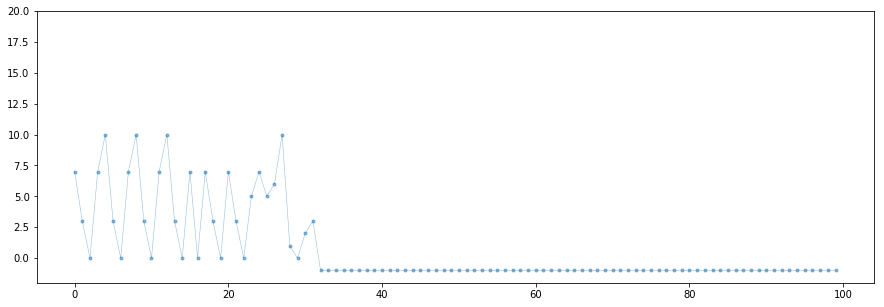

parent  parent_pid process    pid  event         file  \
3875834  python3       11225      sh  12716      7  ld.so.cache   
3875835  python3       11225      sh  12716      3  ld.so.cache   
3875837  python3       11225      sh  12716      0  ld.so.cache   
3875839  python3       11225      sh  12716      7    libc.so.6   
3875840  python3       11225      sh  12716     10    libc.so.6   
3875842  python3       11225      sh  12716      3    libc.so.6   
3875844  python3       11225      sh  12716      0    libc.so.6   

                                         cmd syscalls  
3875834  sh -c leafpad /home/adityas/.bashrc   openat  
3875835  sh -c leafpad /home/adityas/.bashrc    fstat  
3875837  sh -c leafpad /home/adityas/.bashrc    close  
3875839  sh -c leafpad /home/adityas/.bashrc   openat  
3875840  sh -c leafpad /home/adityas/.bashrc     read  
3875842  sh -c leafpad /home/adityas/.bashrc    fstat  
3875844  sh -c leafpad /home/adityas/.bashrc    close

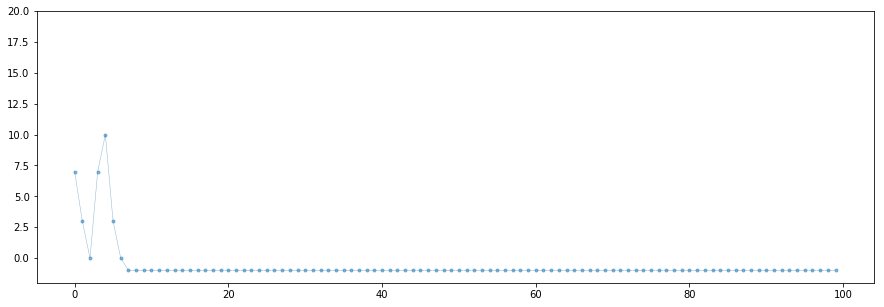

parent  parent_pid  process    pid  event                 file  \
3875846     sh       12716  leafpad  12718      7          ld.so.cache   
3875847     sh       12716  leafpad  12718      3          ld.so.cache   
3875849     sh       12716  leafpad  12718      0          ld.so.cache   
3875851     sh       12716  leafpad  12718      7  libgtk-x11-2.0.so.0   
3875852     sh       12716  leafpad  12718     10  libgtk-x11-2.0.so.0   
3875854     sh       12716  leafpad  12718      3  libgtk-x11-2.0.so.0   
3875856     sh       12716  leafpad  12718      0  libgtk-x11-2.0.so.0   
3875858     sh       12716  leafpad  12718      7  libgdk-x11-2.0.so.0   
3875859     sh       12716  leafpad  12718     10  libgdk-x11-2.0.so.0   
3875861     sh       12716  leafpad  12718      3  libgdk-x11-2.0.so.0   

              cmd syscalls  
3875846  leafpad    openat  
3875847  leafpad     fstat  
3875849  leafpad     close  
3875851  leafpad    openat  
3875852  leafpad      read  
3875854  leafpad     fstat  
3875856  leafpad     close  
3875858  leafpad    openat  
3875859  leafpad      read  
3875861  leafpad     fstat

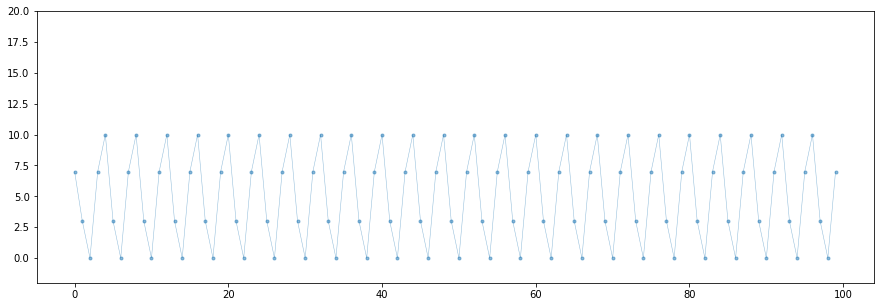

parent  parent_pid process    pid  event         file  \
6427433  python3       11225      sh  13696      7  ld.so.cache   
6427434  python3       11225      sh  13696      3  ld.so.cache   
6427436  python3       11225      sh  13696      0  ld.so.cache   
6427438  python3       11225      sh  13696      7    libc.so.6   
6427439  python3       11225      sh  13696     10    libc.so.6   
6427441  python3       11225      sh  13696      3    libc.so.6   
6427443  python3       11225      sh  13696      0    libc.so.6   

                                                       cmd syscalls  
6427433  sh -c /home/adityas/Projects/LogAnalyser/scrip...   openat  
6427434  sh -c /home/adityas/Projects/LogAnalyser/scrip...    fstat  
6427436  sh -c /home/adityas/Projects/LogAnalyser/scrip...    close  
6427438  sh -c /home/adityas/Projects/LogAnalyser/scrip...   openat  
6427439  sh -c /home/adityas/Projects/LogAnalyser/scrip...     read  
6427441  sh -c /home/adityas/Projects/LogAnalyser/scrip...    fstat  
6427443  sh -c /home/adityas/Projects/LogAnalyser/scrip...    close

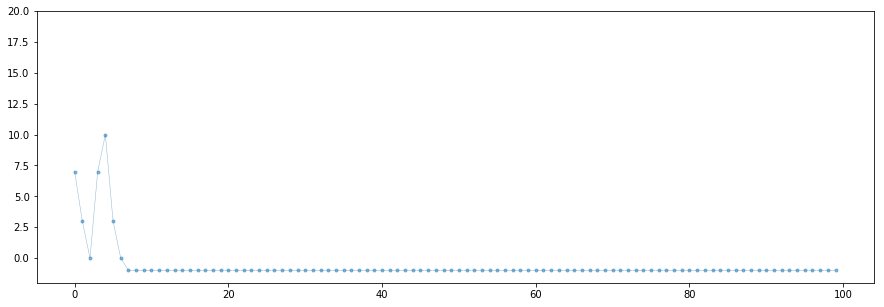

parent  parent_pid    process    pid  event           file  \
6427445     sh       13696  navigator  13697      7    ld.so.cache   
6427446     sh       13696  navigator  13697      3    ld.so.cache   
6427448     sh       13696  navigator  13697      0    ld.so.cache   
6427450     sh       13696  navigator  13697      7  libtinfo.so.5   
6427451     sh       13696  navigator  13697     10  libtinfo.so.5   
6427453     sh       13696  navigator  13697      3  libtinfo.so.5   
6427455     sh       13696  navigator  13697      0  libtinfo.so.5   
6427457     sh       13696  navigator  13697      7     libdl.so.2   
6427458     sh       13696  navigator  13697     10     libdl.so.2   
6427460     sh       13696  navigator  13697      3     libdl.so.2   

                                                       cmd syscalls  
6427445  navigator /home/adityas/Projects/LogAnalyser/s...   openat  
6427446  navigator /home/adityas/Projects/LogAnalyser/s...    fstat  
6427448  navigator /home/adityas/Projects/LogAnalyser/s...    close  
6427450  navigator /home/adityas/Projects/LogAnalyser/s...   openat  
6427451  navigator /home/adityas/Projects/LogAnalyser/s...     read  
6427453  navigator /home/adityas/Projects/LogAnalyser/s...    fstat  
6427455  navigator /home/adityas/Projects/LogAnalyser/s...    close  
6427457  navigator /home/adityas/Projects/LogAnalyser/s...   openat  
6427458  navigator /home/adityas/Projects/LogAnalyser/s...     read  
6427460  navigator /home/adityas/Projects/LogAnalyser/s...    fstat

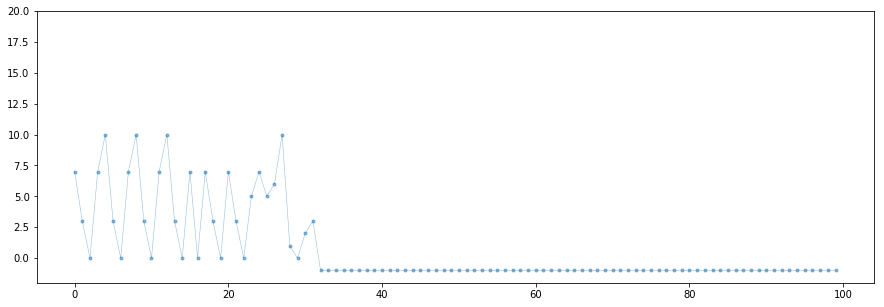

parent  parent_pid process    pid  event         file  \
7340499  python3       11225      sh  14054      7  ld.so.cache   
7340500  python3       11225      sh  14054      3  ld.so.cache   
7340502  python3       11225      sh  14054      0  ld.so.cache   
7340504  python3       11225      sh  14054      7    libc.so.6   
7340505  python3       11225      sh  14054     10    libc.so.6   
7340507  python3       11225      sh  14054      3    libc.so.6   
7340509  python3       11225      sh  14054      0    libc.so.6   

                                         cmd syscalls  
7340499  sh -c leafpad /home/adityas/.bashrc   openat  
7340500  sh -c leafpad /home/adityas/.bashrc    fstat  
7340502  sh -c leafpad /home/adityas/.bashrc    close  
7340504  sh -c leafpad /home/adityas/.bashrc   openat  
7340505  sh -c leafpad /home/adityas/.bashrc     read  
7340507  sh -c leafpad /home/adityas/.bashrc    fstat  
7340509  sh -c leafpad /home/adityas/.bashrc    close

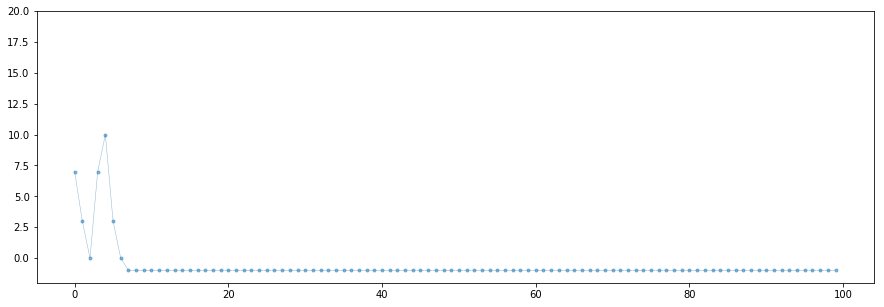

parent  parent_pid      process    pid  event            file  \
7340511     sh       14055      leafpad  14058      7             NaN   
7340512     sh       14055      leafpad  14058      1             NaN   
7340514     sh       14055      leafpad  14058      0             NaN   
7340516     sh       14055  dbus-launch  14058      7     ld.so.cache   
7340517     sh       14055  dbus-launch  14058      3     ld.so.cache   
7340519     sh       14055  dbus-launch  14058      0     ld.so.cache   
7340521     sh       14055  dbus-launch  14058      7  libdbus-1.so.3   
7340522     sh       14055  dbus-launch  14058     10  libdbus-1.so.3   
7340524     sh       14055  dbus-launch  14058      3  libdbus-1.so.3   
7340526     sh       14055  dbus-launch  14058      0  libdbus-1.so.3   

                                                       cmd syscalls  
7340511                                           leafpad    openat  
7340512                                           leafpad       dup  
7340514                                           leafpad     close  
7340516  dbus-launch --autolaunch=9aad7c9b4e4e4c3c9f97a...   openat  
7340517  dbus-launch --autolaunch=9aad7c9b4e4e4c3c9f97a...    fstat  
7340519  dbus-launch --autolaunch=9aad7c9b4e4e4c3c9f97a...    close  
7340521  dbus-launch --autolaunch=9aad7c9b4e4e4c3c9f97a...   openat  
7340522  dbus-launch --autolaunch=9aad7c9b4e4e4c3c9f97a...     read  
7340524  dbus-launch --autolaunch=9aad7c9b4e4e4c3c9f97a...    fstat  
7340526  dbus-launch --autolaunch=9aad7c9b4e4e4c3c9f97a...    close

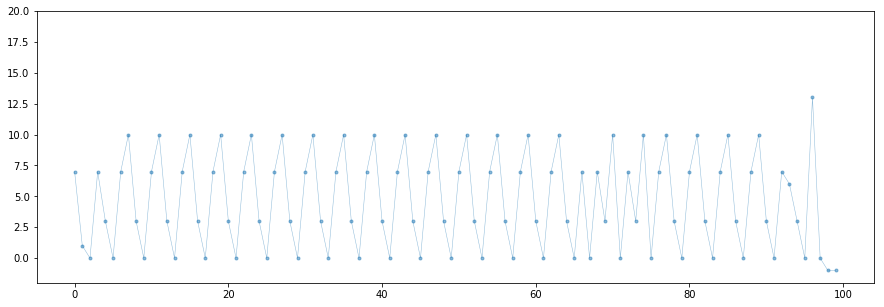

parent  parent_pid process    pid  event          file  \
7340603     sh       14054      sh  14055     10             0   
7340710     sh       14054      sh  14055      7  locale.alias   
7340711     sh       14054      sh  14055      3  locale.alias   
7340713     sh       14054      sh  14055      0  locale.alias   
7340715     sh       14054      sh  14055      7   compose.dir   
7340716     sh       14054      sh  14055      3   compose.dir   
7340718     sh       14054      sh  14055      0   compose.dir   
7340720     sh       14054      sh  14055      7       Compose   
7340721     sh       14054      sh  14055      3       Compose   
7340723     sh       14054      sh  14055      0       Compose   

                                         cmd syscalls  
7340603  sh -c leafpad /home/adityas/.bashrc     read  
7340710  sh -c leafpad /home/adityas/.bashrc   openat  
7340711  sh -c leafpad /home/adityas/.bashrc    fstat  
7340713  sh -c leafpad /home/adityas/.bashrc    close  
7340715  sh -c leafpad /home/adityas/.bashrc   openat  
7340716  sh -c leafpad /home/adityas/.bashrc    fstat  
7340718  sh -c leafpad /home/adityas/.bashrc    close  
7340720  sh -c leafpad /home/adityas/.bashrc   openat  
7340721  sh -c leafpad /home/adityas/.bashrc    fstat  
7340723  sh -c leafpad /home/adityas/.bashrc    close

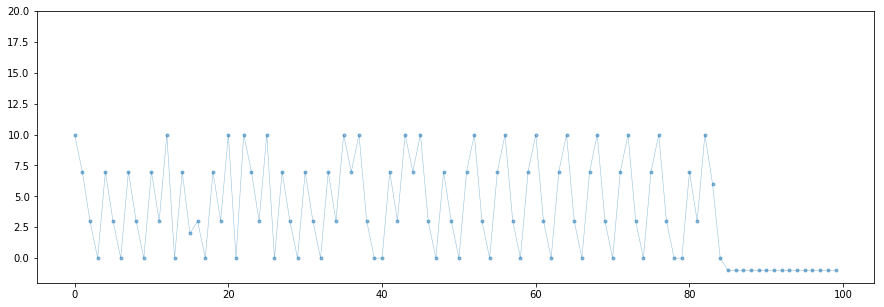

parent  parent_pid process    pid  event         file  \
9484983  python3       11225      sh  14858      7  ld.so.cache   
9484984  python3       11225      sh  14858      3  ld.so.cache   
9484989  python3       11225      sh  14858      0  ld.so.cache   
9484995  python3       11225      sh  14858      7    libc.so.6   
9484996  python3       11225      sh  14858     10    libc.so.6   
9484998  python3       11225      sh  14858      3    libc.so.6   
9485010  python3       11225      sh  14858      0    libc.so.6   

                                                       cmd syscalls  
9484983  sh -c /home/adityas/Projects/LogAnalyser/scrip...   openat  
9484984  sh -c /home/adityas/Projects/LogAnalyser/scrip...    fstat  
9484989  sh -c /home/adityas/Projects/LogAnalyser/scrip...    close  
9484995  sh -c /home/adityas/Projects/LogAnalyser/scrip...   openat  
9484996  sh -c /home/adityas/Projects/LogAnalyser/scrip...     read  
9484998  sh -c /home/adityas/Projects/LogAnalyser/scrip...    fstat  
9485010  sh -c /home/adityas/Projects/LogAnalyser/scrip...    close

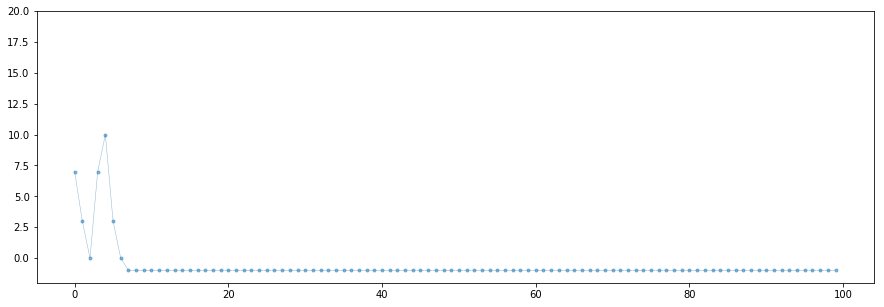

parent  parent_pid    process    pid  event           file  \
9485488     sh       14858  navigator  14860      7    ld.so.cache   
9485489     sh       14858  navigator  14860      3    ld.so.cache   
9485493     sh       14858  navigator  14860      0    ld.so.cache   
9485561     sh       14858  navigator  14860      7  libtinfo.so.5   
9485562     sh       14858  navigator  14860     10  libtinfo.so.5   
9485564     sh       14858  navigator  14860      3  libtinfo.so.5   
9485634     sh       14858  navigator  14860      0  libtinfo.so.5   
9485700     sh       14858  navigator  14860      7     libdl.so.2   
9485701     sh       14858  navigator  14860     10     libdl.so.2   
9485703     sh       14858  navigator  14860      3     libdl.so.2   

                                                       cmd syscalls  
9485488  navigator /home/adityas/Projects/LogAnalyser/s...   openat  
9485489  navigator /home/adityas/Projects/LogAnalyser/s...    fstat  
9485493  navigator /home/adityas/Projects/LogAnalyser/s...    close  
9485561  navigator /home/adityas/Projects/LogAnalyser/s...   openat  
9485562  navigator /home/adityas/Projects/LogAnalyser/s...     read  
9485564  navigator /home/adityas/Projects/LogAnalyser/s...    fstat  
9485634  navigator /home/adityas/Projects/LogAnalyser/s...    close  
9485700  navigator /home/adityas/Projects/LogAnalyser/s...   openat  
9485701  navigator /home/adityas/Projects/LogAnalyser/s...     read  
9485703  navigator /home/adityas/Projects/LogAnalyser/s...    fstat

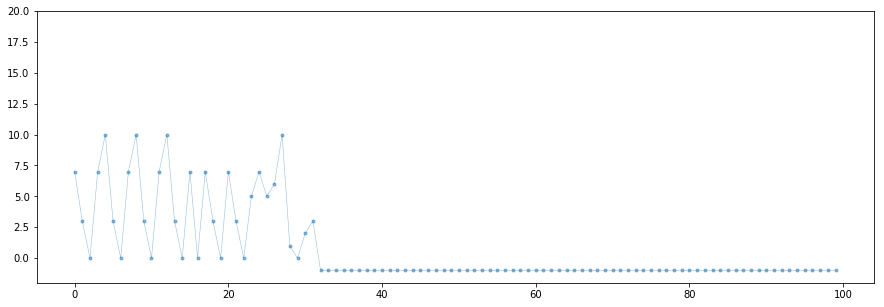

parent  parent_pid process    pid  event         file  \
9957828  python3       11225      sh  15022      7  ld.so.cache   
9957829  python3       11225      sh  15022      3  ld.so.cache   
9957831  python3       11225      sh  15022      0  ld.so.cache   
9957833  python3       11225      sh  15022      7    libc.so.6   
9957834  python3       11225      sh  15022     10    libc.so.6   
9957836  python3       11225      sh  15022      3    libc.so.6   
9957838  python3       11225      sh  15022      0    libc.so.6   

                                                       cmd syscalls  
9957828  sh -c /home/adityas/Projects/LogAnalyser/scrip...   openat  
9957829  sh -c /home/adityas/Projects/LogAnalyser/scrip...    fstat  
9957831  sh -c /home/adityas/Projects/LogAnalyser/scrip...    close  
9957833  sh -c /home/adityas/Projects/LogAnalyser/scrip...   openat  
9957834  sh -c /home/adityas/Projects/LogAnalyser/scrip...     read  
9957836  sh -c /home/adityas/Projects/LogAnalyser/scrip...    fstat  
9957838  sh -c /home/adityas/Projects/LogAnalyser/scrip...    close

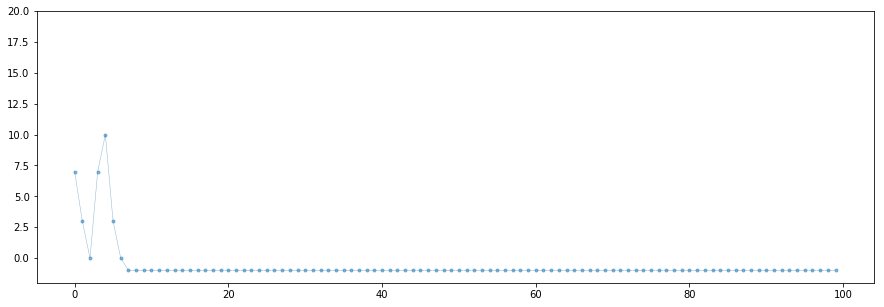

parent  parent_pid process    pid  event             file  cmd  \
9957840     sh       15023      ls  15024      7      ld.so.cache  ls    
9957841     sh       15023      ls  15024      3      ld.so.cache  ls    
9957843     sh       15023      ls  15024      0      ld.so.cache  ls    
9957845     sh       15023      ls  15024      7  libselinux.so.1  ls    
9957846     sh       15023      ls  15024     10  libselinux.so.1  ls    
9957848     sh       15023      ls  15024      3  libselinux.so.1  ls    
9957850     sh       15023      ls  15024      0  libselinux.so.1  ls    
9957852     sh       15023      ls  15024      7        libc.so.6  ls    
9957853     sh       15023      ls  15024     10        libc.so.6  ls    
9957855     sh       15023      ls  15024      3        libc.so.6  ls    

        syscalls  
9957840   openat  
9957841    fstat  
9957843    close  
9957845   openat  
9957846     read  
9957848    fstat  
9957850    close  
9957852   openat  
9957853     read  
9957855    fstat

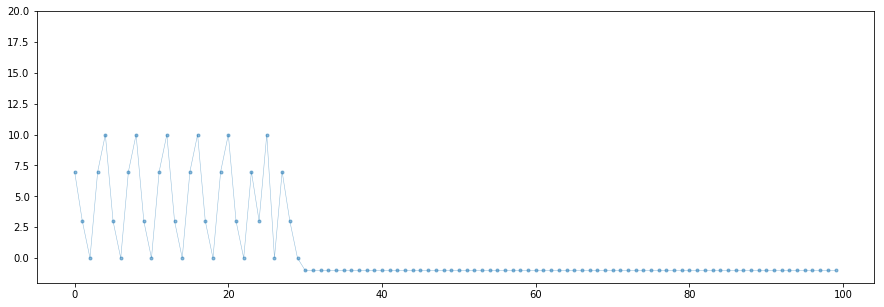

parent  parent_pid process    pid  event             file  \
10017810     sh       15023      ls  15046      7      ld.so.cache   
10017811     sh       15023      ls  15046      3      ld.so.cache   
10017813     sh       15023      ls  15046      0      ld.so.cache   
10017815     sh       15023      ls  15046      7  libselinux.so.1   
10017816     sh       15023      ls  15046     10  libselinux.so.1   
10017818     sh       15023      ls  15046      3  libselinux.so.1   
10017820     sh       15023      ls  15046      0  libselinux.so.1   
10017822     sh       15023      ls  15046      7        libc.so.6   
10017823     sh       15023      ls  15046     10        libc.so.6   
10017825     sh       15023      ls  15046      3        libc.so.6   

                                                        cmd syscalls  
10017810  ls /home/adityas/Projects/LogAnalyser/scripts/...   openat  
10017811  ls /home/adityas/Projects/LogAnalyser/scripts/...    fstat  
10017813  ls /home/adityas/Projects/LogAnalyser/scripts/...    close  
10017815  ls /home/adityas/Projects/LogAnalyser/scripts/...   openat  
10017816  ls /home/adityas/Projects/LogAnalyser/scripts/...     read  
10017818  ls /home/adityas/Projects/LogAnalyser/scripts/...    fstat  
10017820  ls /home/adityas/Projects/LogAnalyser/scripts/...    close  
10017822  ls /home/adityas/Projects/LogAnalyser/scripts/...   openat  
10017823  ls /home/adityas/Projects/LogAnalyser/scripts/...     read  
10017825  ls /home/adityas/Projects/LogAnalyser/scripts/...    fstat

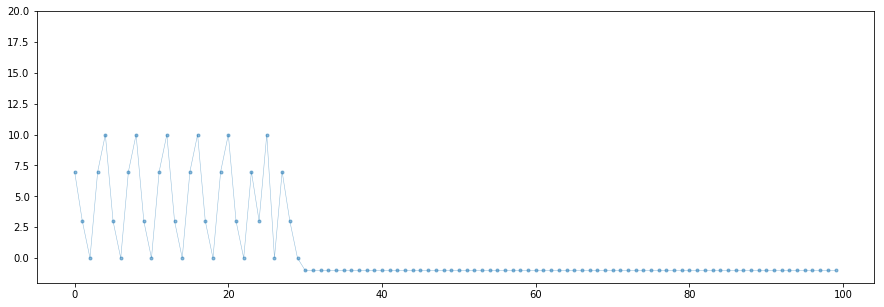

parent  parent_pid process    pid  event            file      cmd  \
10017868     sh       15023   sleep  15048      7     ld.so.cache  sleep 4   
10017869     sh       15023   sleep  15048      3     ld.so.cache  sleep 4   
10017871     sh       15023   sleep  15048      0     ld.so.cache  sleep 4   
10017873     sh       15023   sleep  15048      7       libc.so.6  sleep 4   
10017874     sh       15023   sleep  15048     10       libc.so.6  sleep 4   
10017876     sh       15023   sleep  15048      3       libc.so.6  sleep 4   
10017878     sh       15023   sleep  15048      0       libc.so.6  sleep 4   
10017930     sh       15023   sleep  15048      7  locale-archive  sleep 4   
10017931     sh       15023   sleep  15048      3  locale-archive  sleep 4   
10017937     sh       15023   sleep  15048      0  locale-archive  sleep 4   

         syscalls  
10017868   openat  
10017869    fstat  
10017871    close  
10017873   openat  
10017874     read  
10017876    fstat  
10017878    close  
10017930   openat  
10017931    fstat  
10017937    close

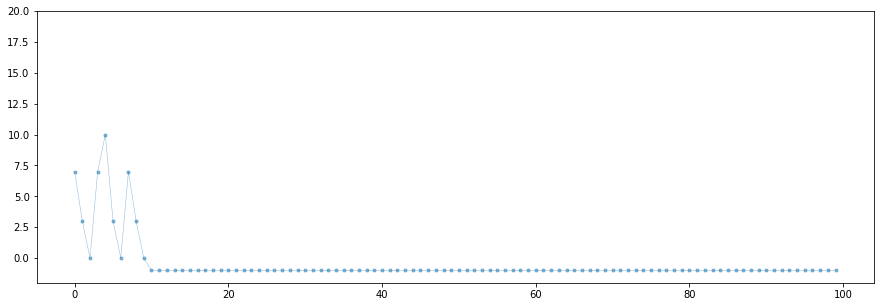

parent  parent_pid process    pid  event            file      cmd  \
10134898     sh       15023   sleep  15090      7     ld.so.cache  sleep 2   
10134899     sh       15023   sleep  15090      3     ld.so.cache  sleep 2   
10134901     sh       15023   sleep  15090      0     ld.so.cache  sleep 2   
10134903     sh       15023   sleep  15090      7       libc.so.6  sleep 2   
10134904     sh       15023   sleep  15090     10       libc.so.6  sleep 2   
10134906     sh       15023   sleep  15090      3       libc.so.6  sleep 2   
10134908     sh       15023   sleep  15090      0       libc.so.6  sleep 2   
10134910     sh       15023   sleep  15090      7  locale-archive  sleep 2   
10134911     sh       15023   sleep  15090      3  locale-archive  sleep 2   
10134913     sh       15023   sleep  15090      0  locale-archive  sleep 2   

         syscalls  
10134898   openat  
10134899    fstat  
10134901    close  
10134903   openat  
10134904     read  
10134906    fstat  
10134908    close  
10134910   openat  
10134911    fstat  
10134913    close

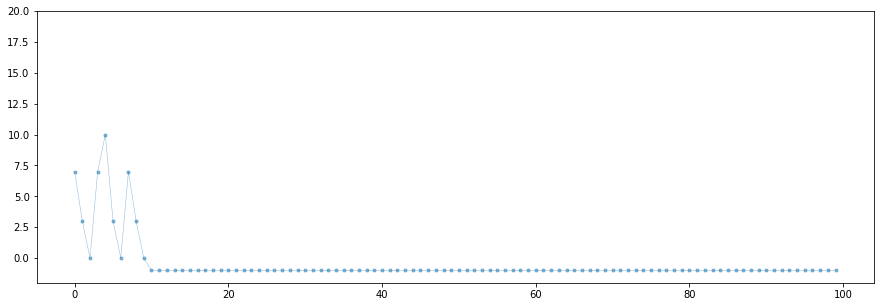

In [25]:
for i in range(len(data_points)):
    display(procs[i].head(10))
    plot_line(data_points[i])
    